# Exploratory Data Analysis
## Mercado de vehículos de segunda mano
### Saúl Arranz

![image](./imagenes/coches.jpg)

# 1. Business case & Data Collection
En los últimos meses/años el mercado de vehículos de segunda mano ha tenido gran importancia debido a la crisis de componentes que ha afectado a la fabricación de nuevos vehículos, así como la incertidumbre creada sobre cuál puede ser el combustible del futuro, todo esto hace dudar a la hora de comprar un vehículo tanto nuevo como de segunda mano. Por esta razón vamos a realizar un estudio sobre el precio de los vehículos de segunda mano en función de diferentes variables como puede ser, Combustible, Kilómetros, Marca, Vendedor, Coomunidad Autónoma...

En la plataforma de datos datamarket.es podemos encontrar los datos de los vehículos de segunda mano a la venta de las principales plataformas.\
Los datos utilizados en este EDA se han obtenido de la base de datos (https://datamarket.es/#coches-de-segunda-mano-dataset).

El conjunto de datos consta de marcas, modelos y versiones de gran cantidad de vehículos, así como potencia, kilómetros, año, precio, vendedor...



## Hipótesis

    - Los vehículos con más km son los más baratos
    - La marca de coches más barata es Dacia
    - Los vehículos híbridos son más caros que los Diésel
    - la media de precios es la misma para todas las comunidades autónomas
    - Los vehículos vendidos por profesionales son más caros que los vendidos por particulares
    - Los vehículos más potentes son los más caros

# 2. Data Understanding

### Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from utils import funciones as fn
from utils import dic
from utils import listas as ls

In [2]:
warnings.filterwarnings('ignore')

### Cargar datos

In [3]:
ruta = f'./data/coches-de-segunda-mano-sample.csv'
df_raw = pd.read_csv(ruta)

In [4]:
df_raw.head()
# El dataset se ha cargado correctamente

url                           company  \
0  e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
1  ff267ebb7e700246f47f84f3db660b4b  9881bcdd5a0ad4733037b3fb25e69c3a   
2  de4b02db28ea7786c622b969be10c7c7  9881bcdd5a0ad4733037b3fb25e69c3a   
3  0449972a4d07594acf92e9a7dd28b39c  9881bcdd5a0ad4733037b3fb25e69c3a   
4  12c4fa49bd4fdf23f19ecf396d3f02ef  9881bcdd5a0ad4733037b3fb25e69c3a   

         make            model  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4        FORD          Transit   

                                             version  price  price_financed  \
0                                   SEAT Toledo  4p.    950             NaN   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200             NaN   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851          7024.0   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426             NaN   
4  FORD Transit 350 96kW L4 Ambiente Propulsion T...  22850         22800.0   

       fuel    year     kms  ...  doors   shift   color photos  \
0    Diésel  2000.0  227000  ...      4  Manual   Verde      5   
1  Gasolina  2017.0   50071  ...      5  Manual  Blanco      6   
2    Diésel  2016.0  103000  ...      4  Manual  Blanco     10   
3    Diésel  2014.0  120000  ...      4  Manual  Blanco      9   
4    Diésel  2017.0  107000  ...      2  Manual  Blanco      4   

   is_professional                            dealer   province country  \
0            False  0f4bb8455d27349b8273109b66a847f3    Navarra   Spain   
1             True                     Autos Raymara   Tenerife   Spain   
2             True                           Auto 96  Barcelona   Spain   
3             True                          Inniauto    Navarra   Spain   
4             True              Autofleet España,s.l    Sevilla   Spain   

          publish_date          insert_date  
0  2020-12-18 10:47:13  2021-01-15 00:00:00  
1  2021-01-02 11:25:40  2021-01-15 00:00:00  
2  2020-12-16 10:51:45  2021-01-15 00:00:00  
3  2020-11-25 11:09:14  2021-01-15 00:00:00  
4  2021-01-12 20:00:34  2021-01-15 00:00:00  

[5 rows x 21 columns]

### Número de filas y columnas

In [5]:
df_raw.shape
# 50000 filas y 21 columnas

(50000, 21)

### Columnas del dataset
Comprobamos que las columnas que tenemos nos ofrecen los datos que necesitamos para confirmar o descartar las hipótesis


In [6]:
df_raw.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

### Tipo de datos

In [7]:
df_raw.dtypes

url                 object
company             object
make                object
model               object
version             object
price                int64
price_financed     float64
fuel                object
year               float64
kms                  int64
power              float64
doors                int64
shift               object
color               object
photos               int64
is_professional       bool
dealer              object
province            object
country             object
publish_date        object
insert_date         object
dtype: object

Las columnas que tiene el dataset:
- ``url:`` identificador del vehículo a la venta
- ``company:`` identificador de la compañía
- ``make:`` marca del vehículo a la venta
- ``model:`` modelo del vehículo a la venta
- ``version:`` modelo del vehículo a la venta
- ``price:`` precio del vehículo a la venta
- ``price_financed:`` precio del vehículo a la venta
- ``fuel:`` combustible del vehículo a la venta
- ``year:`` anyo de compra (nuevo) del vehículo a la venta
- ``kms:`` kilómetros del vehículo a la venta
- ``power:`` potencia del vehículo a la venta
- ``doors:`` nº de puertas del vehículo a la venta
- ``shift:`` tipo de cambio del vehículo a la venta
- ``color:`` color del vehículo a la venta
- ``photos:`` nº de fotos del vehículo a la venta
- ``is_prfessional:`` vendedor profesional (1) o particular (0)
- ``dealer:`` empresa que vende el vehículo
- ``province:`` provincia en la que se vende el vehículo
- ``country:`` país en la que se vende el vehículo
- ``publish_date:`` fecha de publicación del anuncio de la venta
- ``insert_date:`` fecha en la que se incluye el vehículo a al lista


# 3. Data Cleaning

### Operaciones sobre las columnas

Creamos una nueva coolumna llamada ``Comunidad_Autonoma``. De esta manera dismunimos el número de categorías de la variable con la que dividiremos el territorio nacional (la columna provincia la eliminatemos depués)

In [8]:
df_raw['Comunidad_Autonoma']=df_raw.province.apply(fn.comunidades_autonomas)

In [9]:
# Comprobamos que se crea la columna Comunidad_Autonoma
df_raw.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date', 'Comunidad_Autonoma'],
      dtype='object')

Antes de borrar las columnas que no queremos para el análisis, vamos a verificar que no tenemos elementos duplicados. Para verificar los elementos duplicados tenemos que hacerlo antes de borrar las columnas "url" y "company" ya que el resto de colmunas puede que si que se repitan aunque no sea el mismo vehículo (un vehículo puede tener el mismo modelo, versión y kilómetros que otro vehículo sin ser el mismo), con las columnas "url" y "company" nos aseguramos que no son el mismo vehículo

In [10]:
df_raw.duplicated().value_counts()

False    50000
dtype: int64

No hay ningún valor del dataset repetido

En el siguiente paso borramos las columnas que no nos hacen falta

In [11]:
df_raw.drop(columns=ls.borar_col, inplace=True)
# con inplace=True pisamos el dataframe (previamente hemos comprobado
# que se borran las columnas que queremos)

In [12]:
df_raw.columns

Index(['make', 'model', 'version', 'price', 'price_financed', 'fuel', 'year',
       'kms', 'power', 'is_professional', 'dealer', 'Comunidad_Autonoma'],
      dtype='object')

El nombre de las columnas que tenemos en el dataframe es bastante claro, de todas maneras, vamos a renombrar estas columnas para que no quede ninguna duda

In [13]:
df_raw.rename(columns=dic.renombrar_ventas, inplace=True)

Comprobamos que se cambian los nombres de las columnas

In [14]:
df_raw.columns

Index(['Marca', 'Modelo', 'Version', 'Precio', 'Precio_financiado',
       'Combustible', 'Anyo', 'Kilometros', 'Potencia', 'Vendedor_profesional',
       'dealer', 'Comunidad_Autonoma'],
      dtype='object')

### Operaciones sobre los datos

Ahora vamos a analizar los valores missing que tenemos en el dataframe

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49998 non-null  object 
 1   Modelo                49995 non-null  object 
 2   Version               50000 non-null  object 
 3   Precio                50000 non-null  int64  
 4   Precio_financiado     23563 non-null  float64
 5   Combustible           49954 non-null  object 
 6   Anyo                  49998 non-null  float64
 7   Kilometros            50000 non-null  int64  
 8   Potencia              41472 non-null  float64
 9   Vendedor_profesional  50000 non-null  bool   
 10  dealer                50000 non-null  object 
 11  Comunidad_Autonoma    50000 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.2+ MB


* Valores nulos de la variable ``Marca``

In [16]:
df_raw.loc[df_raw.Marca.isnull(),['Version','Modelo','Combustible']]


Version Modelo Combustible
5659    D2S 27kW 3p.    D2S   Eléctrico
47381   D2S 27kW 3p.    D2S   Eléctrico

En este caso buscando en internet podemos comprobar que ese modelo y versión corresponde a un vehículo de la marca ``Invica Electric`` por lo que asignamos esa marca a estos 2 valores missing

In [17]:
df_raw.Marca[df_raw.Marca.isnull()] = 'Invicta Electric';

* Valores nulos de la variable Modelo\
Para rellenar los nulos de la variable modelo, vamos a comparar la versión de dichos nulos con la vaersión de otros que si que tengan el modelo asociado y si alguna de las palabras contenidas en 'versión' coincide con el valor de modelo, podremos asignar ese valor a los modelos nulos.

Para realizar esta operación, antes tenemos que quitar los acentos de la variable Modelo, para poder copararlas sin problema

In [18]:
fn.quitar_acentos(df_raw,'Modelo');

In [19]:
fn.clean_modelo(df_raw,'Version','Modelo');

Quedaría un valor de Modelo nulo que no tenemos forma de rellenar por lo que desecharemos ese valor

In [20]:
df_raw.columns

Index(['Marca', 'Modelo', 'Version', 'Precio', 'Precio_financiado',
       'Combustible', 'Anyo', 'Kilometros', 'Potencia', 'Vendedor_profesional',
       'dealer', 'Comunidad_Autonoma'],
      dtype='object')

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 50000 non-null  object 
 1   Modelo                49999 non-null  object 
 2   Version               50000 non-null  object 
 3   Precio                50000 non-null  int64  
 4   Precio_financiado     23563 non-null  float64
 5   Combustible           49954 non-null  object 
 6   Anyo                  49998 non-null  float64
 7   Kilometros            50000 non-null  int64  
 8   Potencia              41472 non-null  float64
 9   Vendedor_profesional  50000 non-null  bool   
 10  dealer                50000 non-null  object 
 11  Comunidad_Autonoma    50000 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.2+ MB


* Valores nulos de la variable potencia\
Para rellenar los valores nulos de la variable Potencia en primer lugar listaremos los valores de Modelo y Combustible de los valores nulos de potencia, con esos valores de modelo y combustible calcularemos la media de las potencias de los vehículos de los que si que tenemos ese dato y después asignaremos el valor de la media sobre los vehículos con potencia nula. 

In [22]:
fn.complete_colum_null(df_raw,'Modelo','Combustible','Potencia')

Algunos valores de potencia no se han podido completar ya que no había datos de ese modelo y combustible con potencia\
Por esto comprobamos cuantos valores de potencia siguen quedando nulos

In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 50000 non-null  object 
 1   Modelo                49999 non-null  object 
 2   Version               50000 non-null  object 
 3   Precio                50000 non-null  int64  
 4   Precio_financiado     23563 non-null  float64
 5   Combustible           49954 non-null  object 
 6   Anyo                  49998 non-null  float64
 7   Kilometros            50000 non-null  int64  
 8   Potencia              49747 non-null  float64
 9   Vendedor_profesional  50000 non-null  bool   
 10  dealer                50000 non-null  object 
 11  Comunidad_Autonoma    50000 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.2+ MB


Eliminamos los valores nulos de potencia para comprobar cauntos valores no nulos siguen quedando en el resto de variables

In [24]:
df_raw = df_raw[df_raw.Potencia.notnull()]

In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49747 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49747 non-null  object 
 1   Modelo                49747 non-null  object 
 2   Version               49747 non-null  object 
 3   Precio                49747 non-null  int64  
 4   Precio_financiado     23544 non-null  float64
 5   Combustible           49745 non-null  object 
 6   Anyo                  49745 non-null  float64
 7   Kilometros            49747 non-null  int64  
 8   Potencia              49747 non-null  float64
 9   Vendedor_profesional  49747 non-null  bool   
 10  dealer                49747 non-null  object 
 11  Comunidad_Autonoma    49747 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.6+ MB


Después de quitar los valores nulos de potencia ya solo quedarían 2 datos nulos en Combustible, 2 más en Anyo y 6 más en Comunidad_Autonoma que anteriormente denominamos como desconocida

In [26]:
df_raw = df_raw[df_raw.Comunidad_Autonoma != 'Desconocida']

In [27]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49741 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49741 non-null  object 
 1   Modelo                49741 non-null  object 
 2   Version               49741 non-null  object 
 3   Precio                49741 non-null  int64  
 4   Precio_financiado     23544 non-null  float64
 5   Combustible           49739 non-null  object 
 6   Anyo                  49739 non-null  float64
 7   Kilometros            49741 non-null  int64  
 8   Potencia              49741 non-null  float64
 9   Vendedor_profesional  49741 non-null  bool   
 10  dealer                49741 non-null  object 
 11  Comunidad_Autonoma    49741 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.6+ MB


In [28]:
df_raw[df_raw.Combustible.isnull()]

Marca   Modelo                     Version  Precio  \
26639           FORD   Mondeo            FORD Mondeo  4p.   19900   
37786  MERCEDES-BENZ  Clase C  MERCEDES-BENZ Clase C  5p.   35695   

       Precio_financiado Combustible    Anyo  Kilometros  Potencia  \
26639            17910.0         NaN  2018.0       54605     190.0   
37786                NaN         NaN  2019.0       13126     184.0   

       Vendedor_profesional                dealer   Comunidad_Autonoma  
26639                  True       HR Motor Madrid  Comunidad_de_Madrid  
37786                  True  Mercedes-Benz Madrid  Comunidad_de_Madrid

In [29]:
df_raw[(df_raw.Modelo == 'Clase C') & (df_raw.Potencia == 184)].sample(5)

Marca   Modelo                                 Version  Precio  \
41102  MERCEDES-BENZ  Clase C  MERCEDES-BENZ Clase C C Cabrio 200 2p.   40999   
10771  MERCEDES-BENZ  Clase C         MERCEDES-BENZ Clase C C 200 4p.   36900   
20894  MERCEDES-BENZ  Clase C  MERCEDES-BENZ Clase C C 200 Estate 5p.   35900   
45922  MERCEDES-BENZ  Clase C   MERCEDES-BENZ Clase C C Coupe 200 2p.   39000   
27254  MERCEDES-BENZ  Clase C   MERCEDES-BENZ Clase C C Coupe 200 2p.   31500   

       Precio_financiado Combustible    Anyo  Kilometros  Potencia  \
41102            37699.0    Gasolina  2019.0        4074     184.0   
10771            35900.0     Híbrido  2019.0        3284     184.0   
20894            33900.0     Híbrido  2020.0        7300     184.0   
45922                NaN    Gasolina  2018.0       52000     184.0   
27254                NaN    Gasolina  2017.0       29000     184.0   

       Vendedor_profesional                            dealer  \
41102                  True               DriveOn -  Valencia   
10771                  True                          Autolica   
20894                  True                          Santogal   
45922                 False  7f5709f15a8266535c0cf83433b3d556   
27254                  True                    Autos Diamante   

         Comunidad_Autonoma  
41102  Comunidad_Valenciana  
10771             Catalunya  
20894   Comunidad_de_Madrid  
45922   Comunidad_de_Madrid  
27254            País_Vasco

Se decide prescindir de los vehículos con los valores nulos de Combustible y anyo ya que son solo 4 vehículos y no sería preciso coger los valores del resto de modelos con esos anyos y combustibles por la variadad que encontramos (mismo modelo con varios años distintos y mismo modelo con varios combustibles distintos)

In [30]:
df_raw = df_raw[df_raw.Anyo.notnull() & df_raw.Combustible.notnull()]

In [31]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49737 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49737 non-null  object 
 1   Modelo                49737 non-null  object 
 2   Version               49737 non-null  object 
 3   Precio                49737 non-null  int64  
 4   Precio_financiado     23541 non-null  float64
 5   Combustible           49737 non-null  object 
 6   Anyo                  49737 non-null  float64
 7   Kilometros            49737 non-null  int64  
 8   Potencia              49737 non-null  float64
 9   Vendedor_profesional  49737 non-null  bool   
 10  dealer                49737 non-null  object 
 11  Comunidad_Autonoma    49737 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.6+ MB


Para dejar el dataframe completamente listo quedaría cambiar el type de las variables Anyo y Vendedor_profesional, ya que están como ``float`` y ``bool`` repectivamente, pero son variables categóricas

In [32]:
df_raw.Anyo = df_raw.Anyo.astype(str)
df_raw.Vendedor_profesional = df_raw.Vendedor_profesional.astype(str)

In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49737 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49737 non-null  object 
 1   Modelo                49737 non-null  object 
 2   Version               49737 non-null  object 
 3   Precio                49737 non-null  int64  
 4   Precio_financiado     23541 non-null  float64
 5   Combustible           49737 non-null  object 
 6   Anyo                  49737 non-null  object 
 7   Kilometros            49737 non-null  int64  
 8   Potencia              49737 non-null  float64
 9   Vendedor_profesional  49737 non-null  object 
 10  dealer                49737 non-null  object 
 11  Comunidad_Autonoma    49737 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.9+ MB


Ya tendríamos el df listo, guardamos una copia en formato pkl

In [34]:
df_raw.drop(columns=['Precio_financiado','Modelo','Version'],inplace=True)

In [35]:
df_raw.to_pickle('data/df.pkl')

In [36]:
df = pd.read_pickle('data/df.pkl')

In [37]:
df.head()

Marca  Precio Combustible    Anyo  Kilometros    Potencia  \
0        SEAT     950      Diésel  2000.0      227000  111.923077   
1     CITROEN    6200    Gasolina  2017.0       50071   82.000000   
2        FORD    7851      Diésel  2016.0      103000  100.000000   
3  VOLKSWAGEN   19426      Diésel  2014.0      120000  140.000000   
4        FORD   22850      Diésel  2017.0      107000  130.000000   

  Vendedor_profesional                            dealer Comunidad_Autonoma  
0                False  0f4bb8455d27349b8273109b66a847f3            Navarra  
1                 True                     Autos Raymara           Canarias  
2                 True                           Auto 96          Catalunya  
3                 True                          Inniauto            Navarra  
4                 True              Autofleet España,s.l          Andalucía

# 4. Analysis

## Analysis univariante

In [38]:
df.columns

Index(['Marca', 'Precio', 'Combustible', 'Anyo', 'Kilometros', 'Potencia',
       'Vendedor_profesional', 'dealer', 'Comunidad_Autonoma'],
      dtype='object')

### Variables numéricas

* Precio

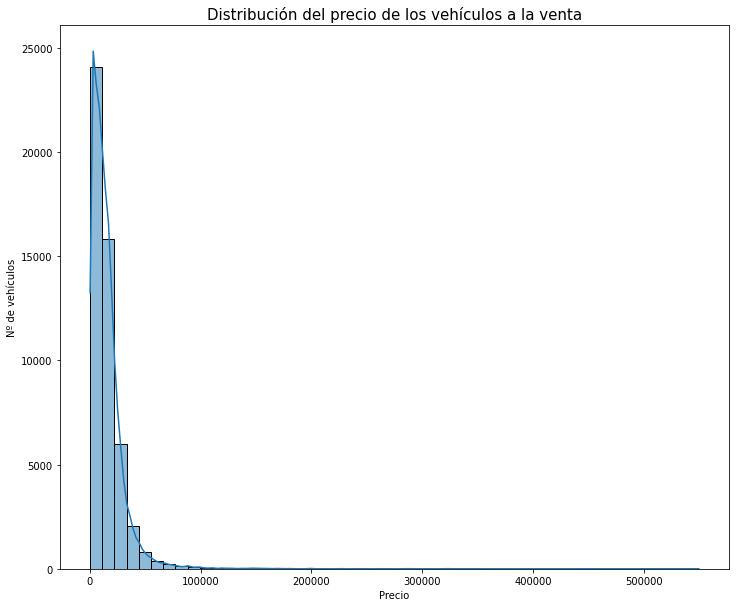

In [39]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.histplot(data=df, x="Precio", bins=50, kde=True);
plt.savefig('./imagenes/dist_precio.png')

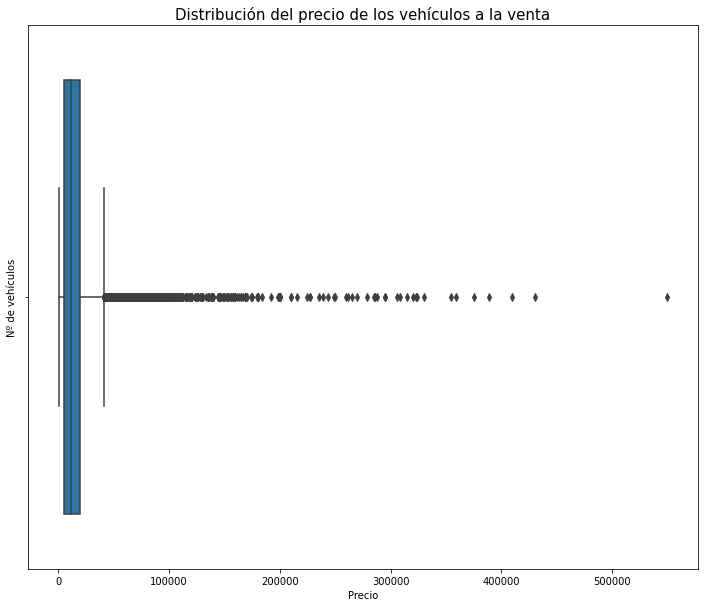

In [40]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.boxplot(data=df, x="Precio");

La mayor parte de los precios se encuentran entre 0 y 50000€, hay un unos pocos vehículos con un precio muy elevado, esto hace que los precios se concentren en la primera parte de la gráfica

* Potencia

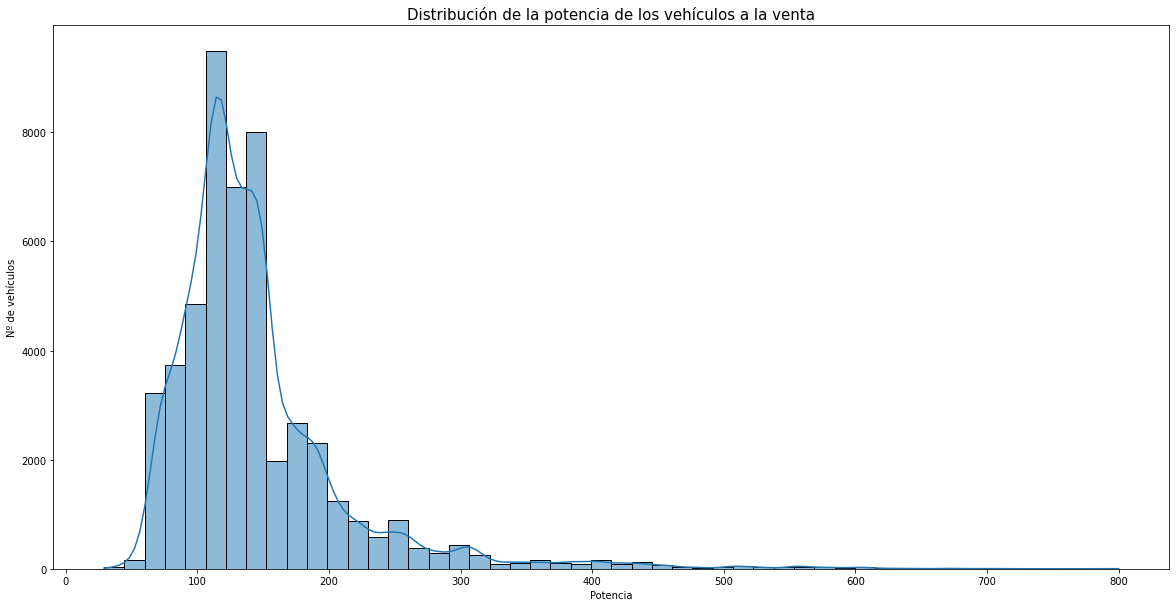

In [41]:
plt.figure(figsize=(20,10),facecolor='w');
plt.title('Distribución de la potencia de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Potencia')
sns.histplot(data=df, x="Potencia", bins=50, kde=True);
plt.savefig('./imagenes/dist_potencia.png')

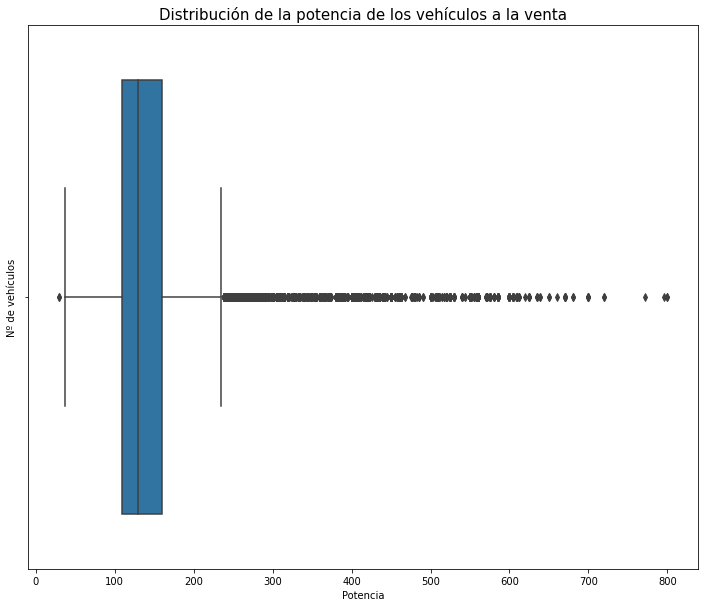

In [42]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución de la potencia de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Potencia')
sns.boxplot(data=df, x="Potencia");

Estamos tratando la variable Potencia poco continua, por eso comprobamos cuantos valores únicos tiene

In [43]:
df.Potencia.nunique()

844

Tiene muchos valores únicos, 844

* kilometros

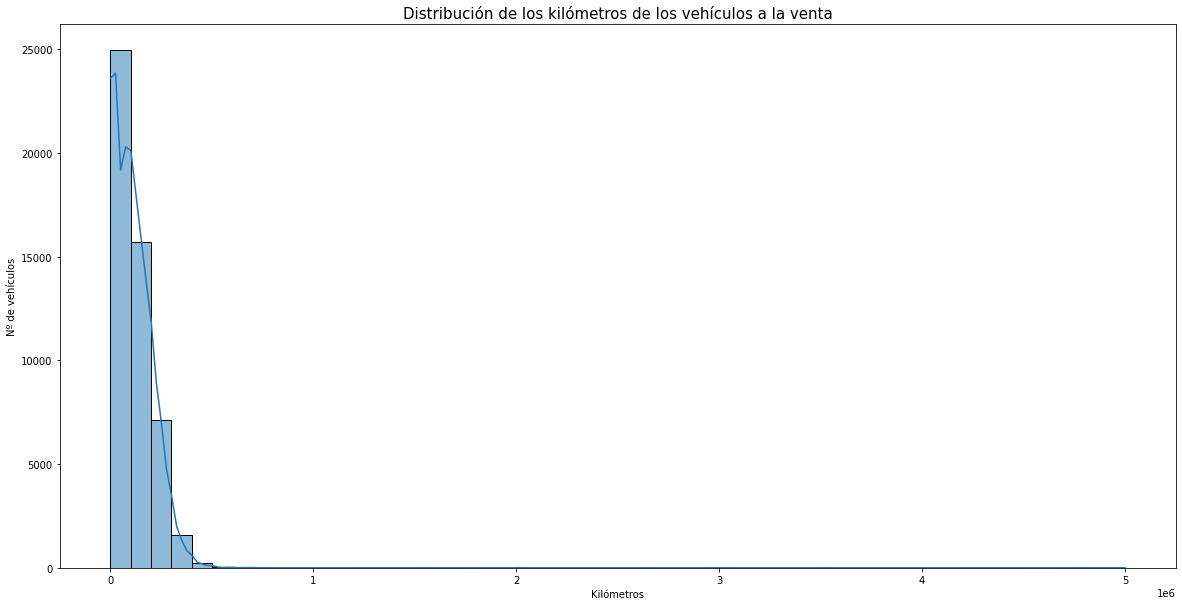

In [44]:
plt.figure(figsize=(20,10),facecolor='w');
plt.title('Distribución de los kilómetros de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Kilómetros')
sns.histplot(data=df, x="Kilometros", bins=50, kde=True);
plt.savefig('./imagenes/dist_km.png')

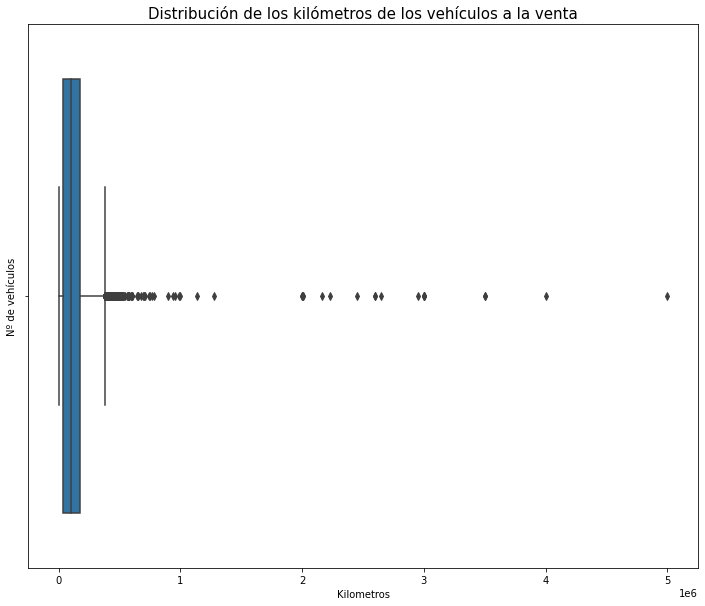

In [45]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución de los kilómetros de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Kilómetros')
sns.boxplot(data=df, x="Kilometros");

El eje "x" de kilometros, está $\times 10^6$

A continuación mostramos los datos de medias, cuartiles, valor min, valor max ...

In [46]:
df.describe()

Precio    Kilometros      Potencia
count   49737.000000  4.973700e+04  49737.000000
mean    15216.217323  1.160105e+05    144.732645
std     16506.200675  1.072005e+05     68.229481
min       300.000000  0.000000e+00     29.000000
25%      5500.000000  3.810000e+04    109.000000
50%     11850.000000  9.990000e+04    130.000000
75%     19890.000000  1.740000e+05    160.000000
max    549900.000000  5.000000e+06    800.000000

Como hemos podido ver en las gráficas, las variables numéricas tienen muchos valores outliers por lo que vamos a eliminar esos valores outliers para poder realizar un mejor análisis ya que lo que nos interesa es hacer un análisis general sin tener en cuenta vehículos exclusivos como pueden ser los que tienen mucha potencia o los que cuestan mucho dinero, o vehículos muy usados como son los que tienen muchos kilómetros

In [47]:
fn.outliers(df)

Precio  Kilometros  Potencia
num_outliers   2195.0       475.0    3836.0
valor_min    -16085.0   -165750.0      32.5
valor_max     41475.0    377850.0     236.5

In [48]:
filtro_outliers = (
    df.Precio < 41475) & (
        df.Potencia < 236.5) & (
            df.Kilometros < 377850)

In [49]:
df_so = df[filtro_outliers]
df_so.head()

Marca  Precio Combustible    Anyo  Kilometros    Potencia  \
0        SEAT     950      Diésel  2000.0      227000  111.923077   
1     CITROEN    6200    Gasolina  2017.0       50071   82.000000   
2        FORD    7851      Diésel  2016.0      103000  100.000000   
3  VOLKSWAGEN   19426      Diésel  2014.0      120000  140.000000   
4        FORD   22850      Diésel  2017.0      107000  130.000000   

  Vendedor_profesional                            dealer Comunidad_Autonoma  
0                False  0f4bb8455d27349b8273109b66a847f3            Navarra  
1                 True                     Autos Raymara           Canarias  
2                 True                           Auto 96          Catalunya  
3                 True                          Inniauto            Navarra  
4                 True              Autofleet España,s.l          Andalucía

* Precio sin outliers

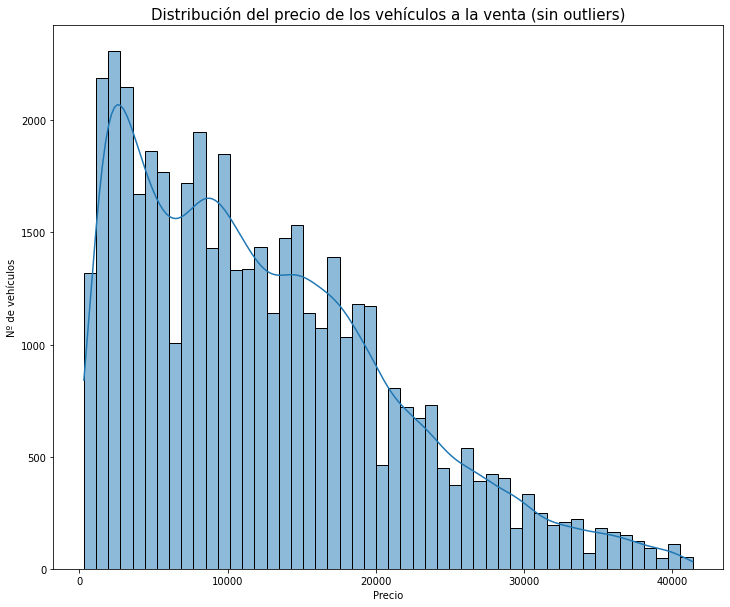

In [50]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta (sin outliers)', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.histplot(data=df_so, x="Precio", bins=50, kde=True);
plt.savefig('./imagenes/dist_precio_so.png')

Quitando los outliers, la distribución de los precios sigue sin ser una distribución normal, en cualquier caso, realizamos un normmaltest de scipy para confirmarlo de manera estadística. El test shapiro no sería adecuado ya que no es preciso para muestras superiores a 5000observaciones.

$$ H_0 = \text{La distribución es normal}\\
H_1 = \text{La distribución no es normal} $$

In [51]:
stat_so, p_value_so =stats.normaltest(df_so.Precio)
if p_value_so > 0.05:
    print(
        f'p_value = {p_value_so}. Se acepta la hipótesis nula --> tenemos una distribución normal')
else:
    print(
        f'p_value = {p_value_so}. Se rechaza la hipótesis nula --> no tenemos una distribución normal')

p_value = 0.0. Se rechaza la hipótesis nula --> no tenemos una distribución normal


Mas adelante aplicaremos el teorema del limite central para poder aplicar Anova y comparar las medias de precio en diferentes categorías

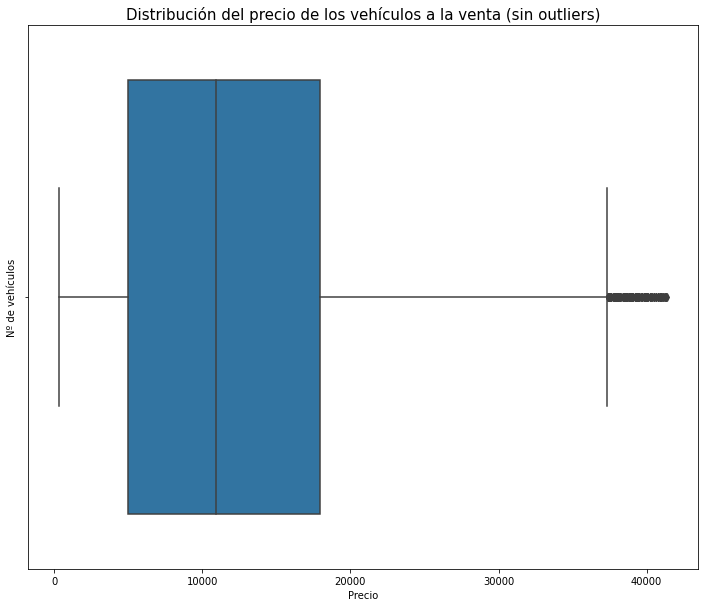

In [52]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta (sin outliers)', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.boxplot(data=df_so, x="Precio");

* Potencia sin outliers

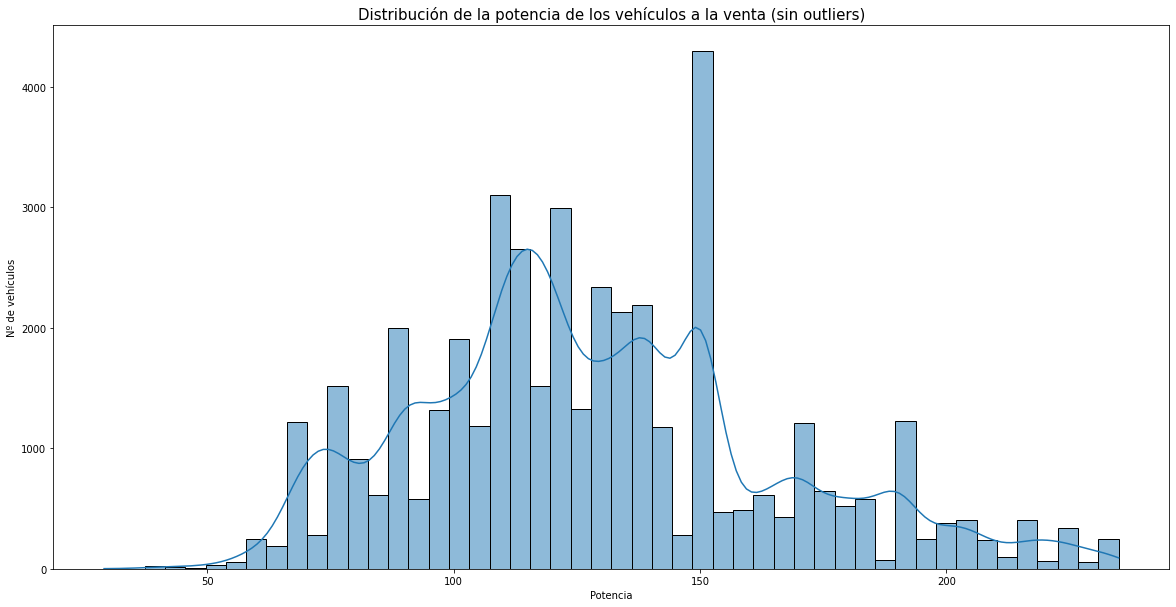

In [53]:
plt.figure(figsize=(20,10),facecolor='w');
plt.title('Distribución de la potencia de los vehículos a la venta (sin outliers)', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Potencia')
sns.histplot(data=df_so, x="Potencia", bins=50, kde=True);
plt.savefig('./imagenes/dist_potencia_so.png')

In [54]:
stat_so_po, p_value_so_po =stats.normaltest(df_so.Potencia)
if p_value_so > 0.05:
    print(
        f'p_value = {p_value_so_po}. Se acepta la hipótesis nula --> tenemos una distribución normal')
else:
    print(
        f'p_value = {p_value_so_po}. Se rechaza la hipótesis nula --> no tenemos una distribución normal')

p_value = 0.0. Se rechaza la hipótesis nula --> no tenemos una distribución normal


* Kilómetros sin outliers

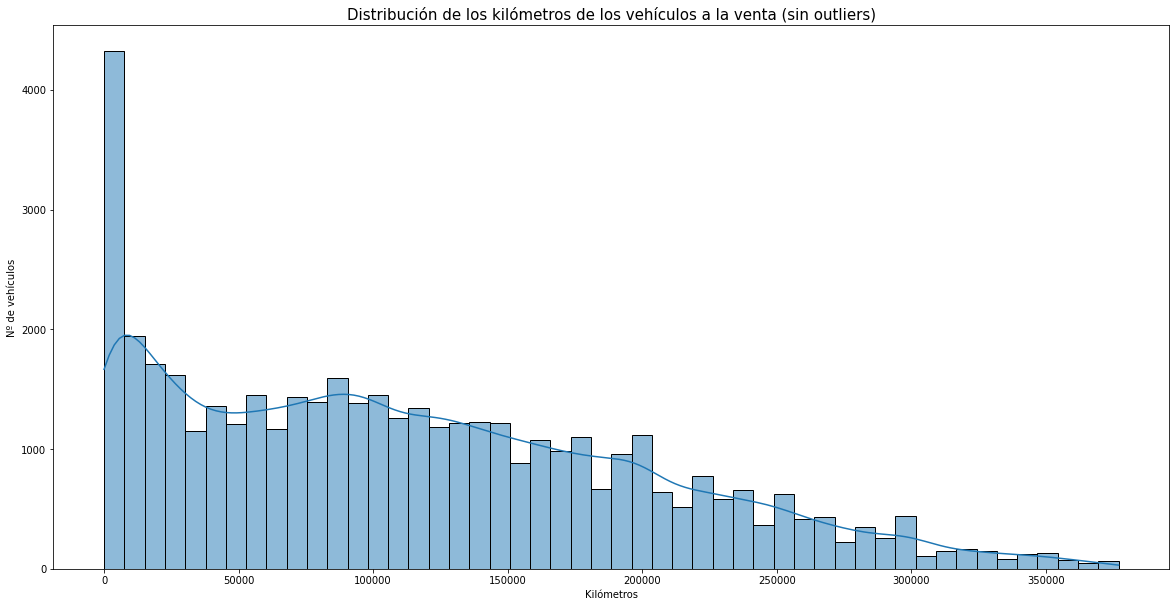

In [55]:
plt.figure(figsize=(20,10),facecolor='w');
plt.title('Distribución de los kilómetros de los vehículos a la venta (sin outliers)', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Kilómetros')
sns.histplot(data=df_so, x="Kilometros", bins=50, kde=True);
plt.savefig('./imagenes/dist_km_so.png')

In [56]:
stat_so_ki, p_value_so_ki =stats.normaltest(df_so.Kilometros)
if p_value_so > 0.05:
    print(
        f'p_value = {p_value_so_ki}. Se acepta la hipótesis nula --> tenemos una distribución normal')
else:
    print(
        f'p_value = {p_value_so_ki}. Se rechaza la hipótesis nula --> no tenemos una distribución normal')

p_value = 0.0. Se rechaza la hipótesis nula --> no tenemos una distribución normal


En el caso de los kilómetros y la potencia no aplicaremos ninguna transformación para construir una normal ya que no realizaremos comparaciones con otras variables categóricas

A continuación mostramos los datos de medias, cuartiles, valor min, valor max.. pero con los valores filtrados sin outliers

In [57]:
df_so.describe()

Precio     Kilometros      Potencia
count  44829.000000   44829.000000  44829.000000
mean   12489.976154  114090.613576    128.652770
std     8830.186692   86507.541545     36.299509
min      300.000000       0.000000     29.000000
25%     5000.000000   40000.000000    105.000000
50%    10900.000000  100000.000000    124.000000
75%    17940.000000  174000.000000    150.000000
max    41400.000000  377000.000000    235.000000

### Variables categóricas

* Marca

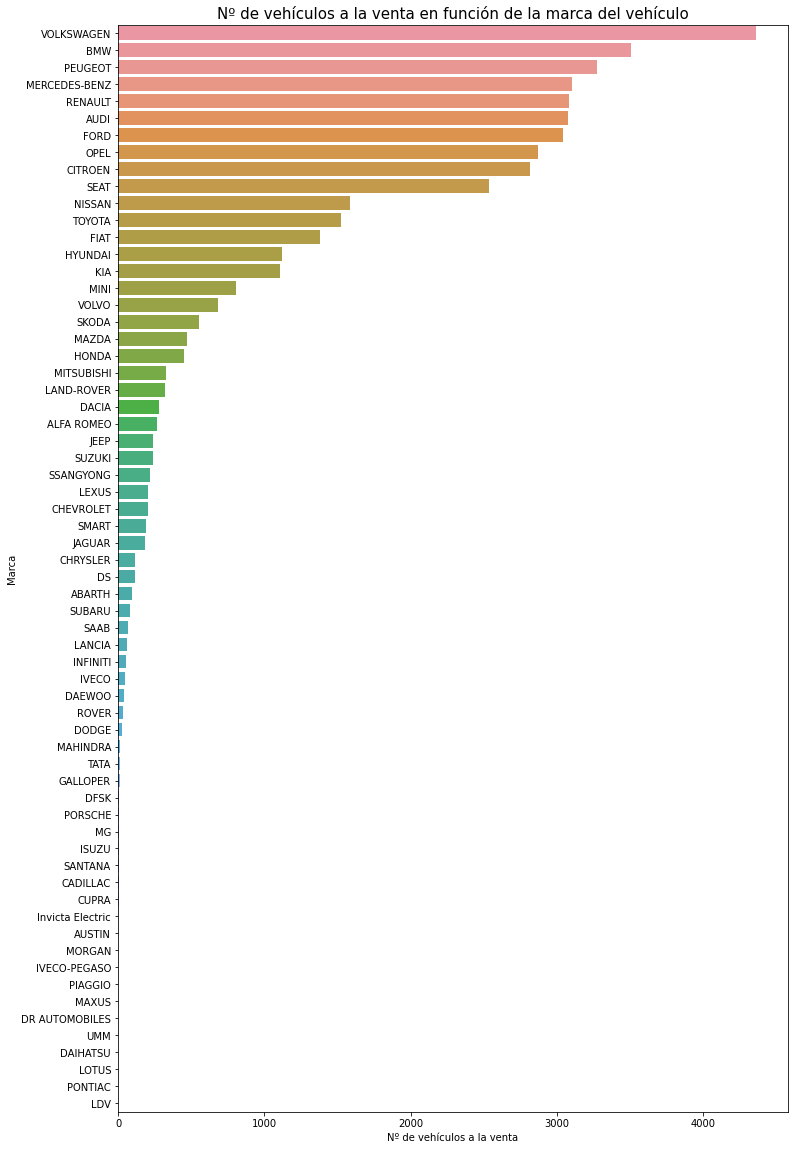

In [58]:
plt.figure(figsize=(12,20),facecolor='w');
plt.title('Nº de vehículos a la venta en función de la marca del vehículo', fontsize=15);
plt.ylabel('Marca')
plt.xlabel('Nº de vehículos a la venta')
sns.barplot(y=df_so.Marca.value_counts().index,x=df_so.Marca.value_counts().values);
plt.savefig('./imagenes/dist_marca.png')

Se ve claramente un salto entre las 10 marcas con más vehículos a la venta y el resto de marcas. Hay muchas marcas de vehículos que tienen muy pocos coches a la venta

* Combustible

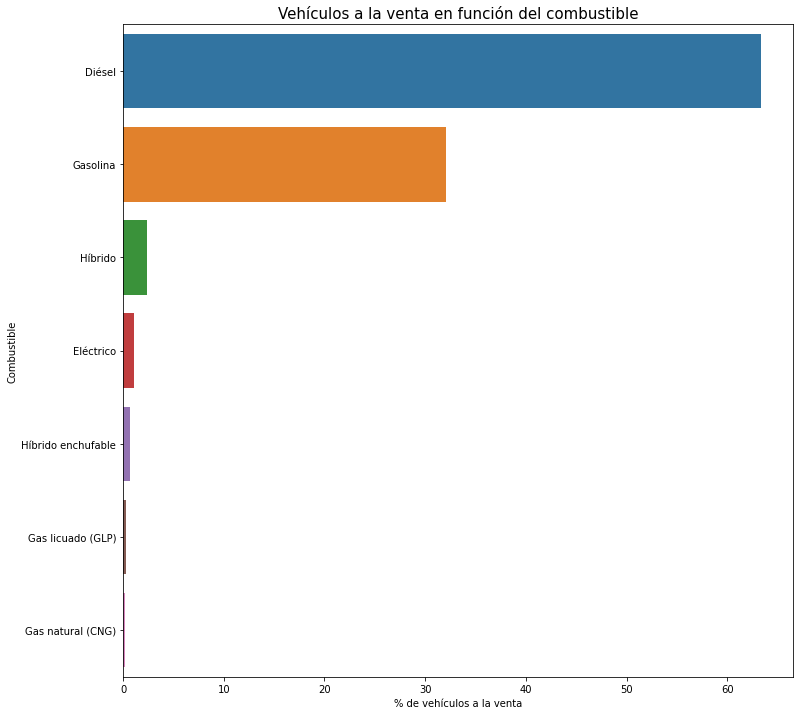

In [59]:
plt.figure(figsize=(12,12),facecolor='w');
plt.title('Vehículos a la venta en función del combustible', fontsize=15);
plt.ylabel('Combustible')
plt.xlabel('% de vehículos a la venta')
sns.barplot(y=df_so.Combustible.value_counts().index,x=(
    df_so.Combustible.value_counts(normalize=True).values)*100);
plt.savefig('./imagenes/dist_combustible.png')

En este caso mostramos el grafico en % para ver el reparto. En el mercado de vehículos de 2ª mano, los vehículos Diésel y Gasolina siguen siendo los grandes protagonistas, es lógico ya que el "boom" de vehículos híbridos y eléctircos ha sido en los últimos 3 años, por lo que todavía hay pocos vehículos de 2ª mano.

* Anyo

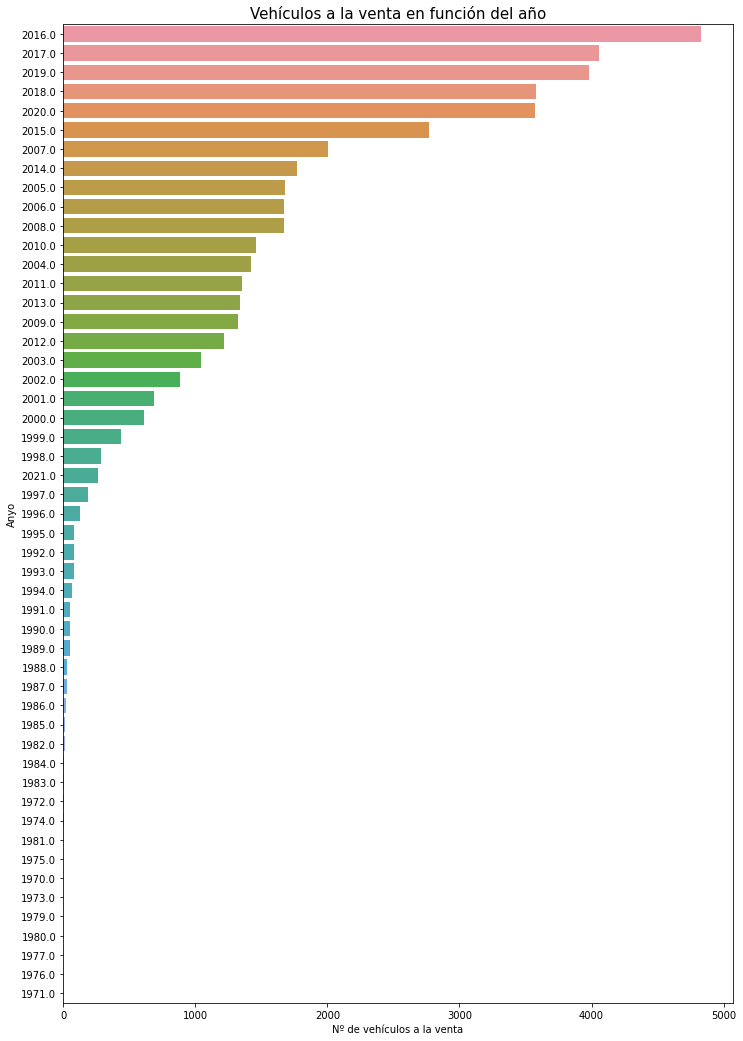

In [60]:
plt.figure(figsize=(12,18),facecolor='w');
plt.title('Vehículos a la venta en función del año', fontsize=15);
plt.ylabel('Anyo')
plt.xlabel('Nº de vehículos a la venta')
sns.barplot(y=df_so.Anyo.value_counts().index,x=df_so.Anyo.value_counts().values);
plt.savefig('./imagenes/dist_anyo.png')

Los vehículos que más se venden son los que tienen una antigüedad de entre 2 y 7 años

* Vendedor_profesional

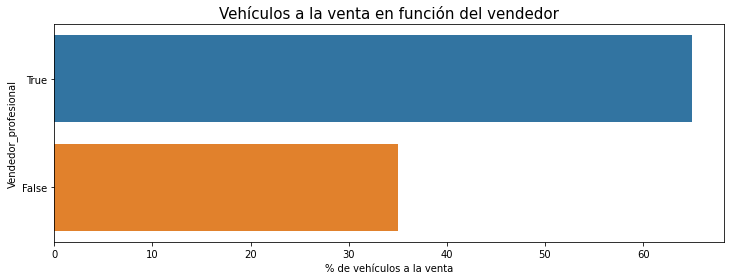

In [61]:
plt.figure(figsize=(12,4),facecolor='w');
plt.title('Vehículos a la venta en función del vendedor', fontsize=15);
plt.ylabel('Vendedor_profesional')
plt.xlabel('% de vehículos a la venta')
sns.barplot(y=df_so.Vendedor_profesional.value_counts().index,x=(
    df_so.Vendedor_profesional.value_counts(normalize=True).values)*100);

Hay muchos más vehículos vendidos por profesionales que por particulares

* Comuunidad Autónoma

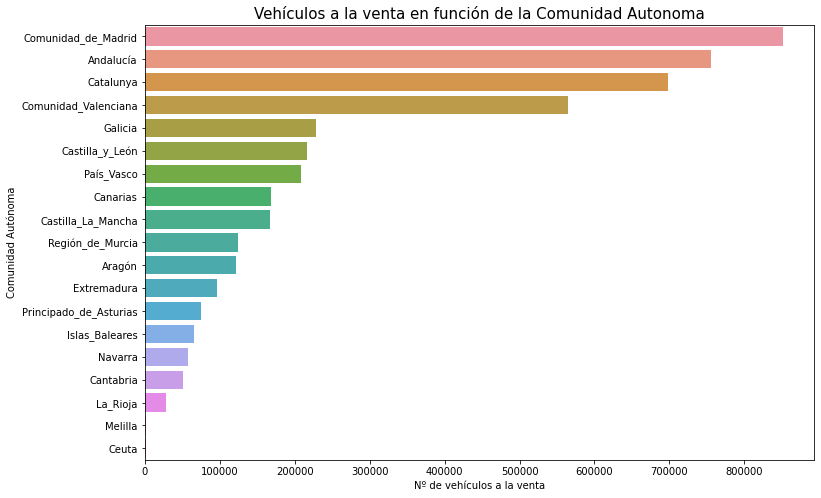

In [62]:
plt.figure(figsize=(12,8),facecolor='w');
plt.title('Vehículos a la venta en función de la Comunidad Autonoma', fontsize=15);
plt.ylabel('Comunidad Autónoma')
plt.xlabel('Nº de vehículos a la venta')
sns.barplot(y=df_so.Comunidad_Autonoma.value_counts().index,x=(
    df_so.Comunidad_Autonoma.value_counts().values)*100);
plt.savefig('./imagenes/dist_com_aut.png')

Sobre la gráfica se ve claro como las comunidades con más habitantes son las que más vehículos tienen a la venta.

En la gráfica de comunidaes autónomas vemos como Melilla y Cueta no tienen prácticamente vehículos a la venta comparados con el resto de comunidades. Como en el análisis vamos a tener en cuenta las comunidades, vamos a eliminar estas 2 ciudades autónomas que aportan muy pocos datos al global.\
Haremos lo mismo con los vehículos de combustible gas, ya que como hemos visto en la gráfica de combustible aportan muy pocos datos al global

In [63]:
df_so_fil = df_so[(df_so.Comunidad_Autonoma != 'Melilla')&
                    (df_so.Comunidad_Autonoma != 'Ceuta')& 
                    (df_so.Combustible!= 'Gas natural (CNG)')& 
                    (df_so.Combustible!= 'Gas licuado (GLP)')] 

## Analysis bivariante

Primero vamos a mostrar un mapa de calor con la correlación entre las variables numércias

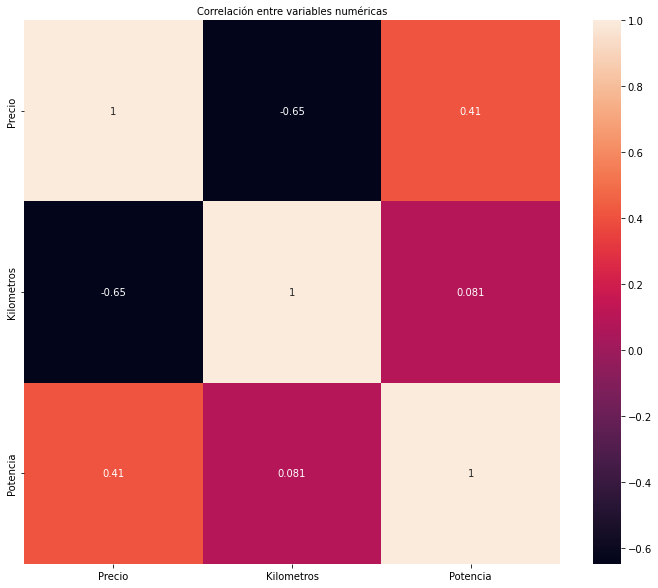

In [64]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Correlación entre variables numéricas', fontsize=10);
sns.heatmap(df_so_fil.corr(),annot=True, facecolor='w');
plt.savefig('./imagenes/corr_numericas.png')

Se ve cierta relación entre los kilómetros y el precio (a más kilómetros, menor precio).\
Finalmente se ve cierta relación entre el Precio y la potencia

* Kilómetros - Precio

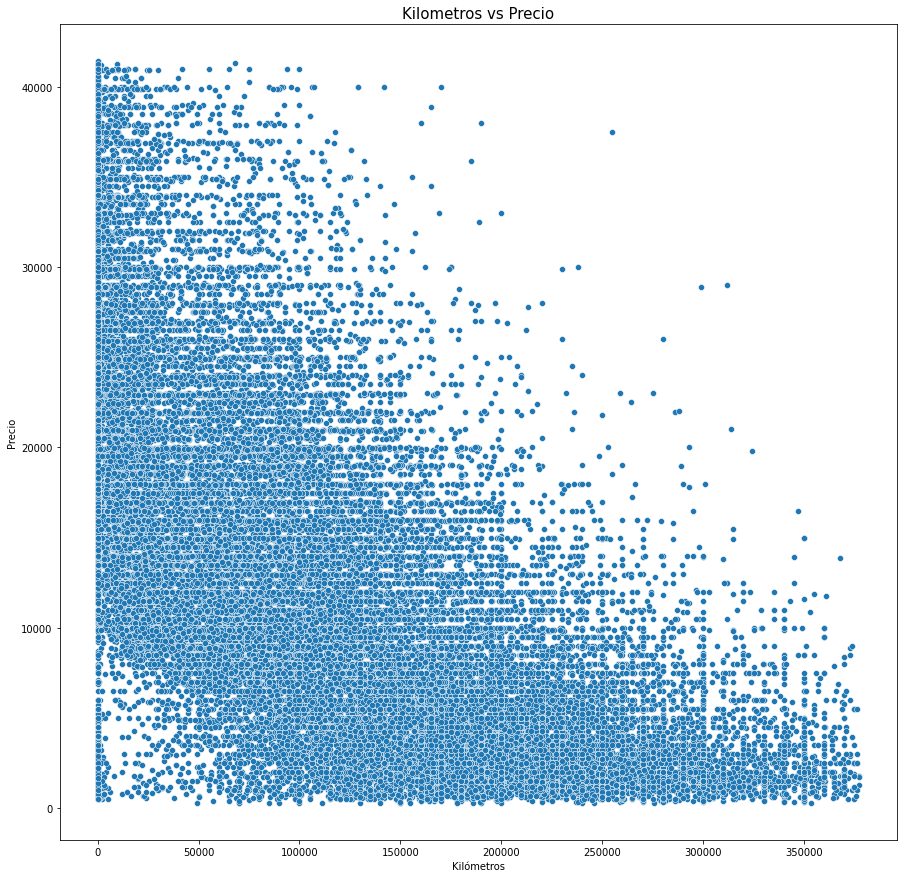

In [65]:
plt.figure(figsize=(15,15),facecolor='w');
plt.title('Kilometros vs Precio', fontsize=15);
plt.ylabel('Precio')
plt.xlabel('Kilómetros')
sns.scatterplot(x=df_so_fil.Kilometros,y=df_so_fil.Precio);
plt.savefig('./imagenes/km_vs_precio.png')

Como ya hemos visto en el mapa de calor, a medida que aumentan los kilómetros disminuye el precio con bastante relación. los puntos muestran mucha amplitud de precios para los mismos kilómetros, más adelante investigaremos a qué puede ser debido.

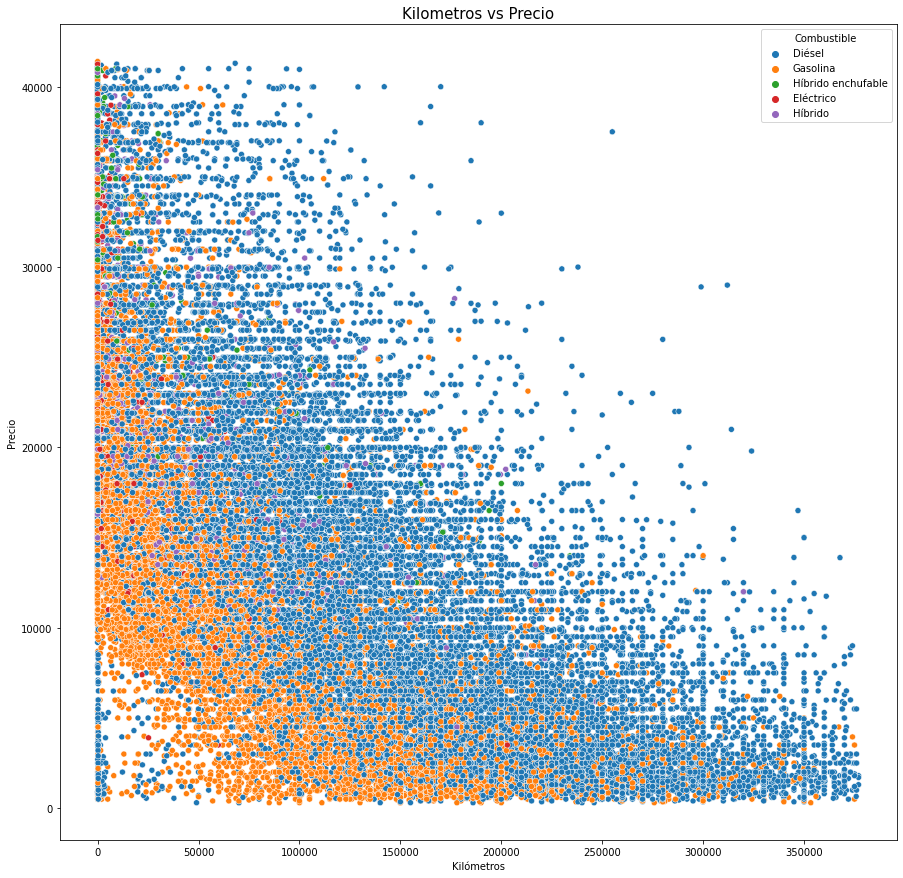

In [66]:
plt.figure(figsize=(15,15),facecolor='w');
plt.title('Kilometros vs Precio', fontsize=15);
plt.ylabel('Precio')
plt.xlabel('Kilómetros')
sns.scatterplot(x=df_so_fil.Kilometros,y=df_so.Precio, hue=df_so_fil.Combustible);

* Precio - Potencia

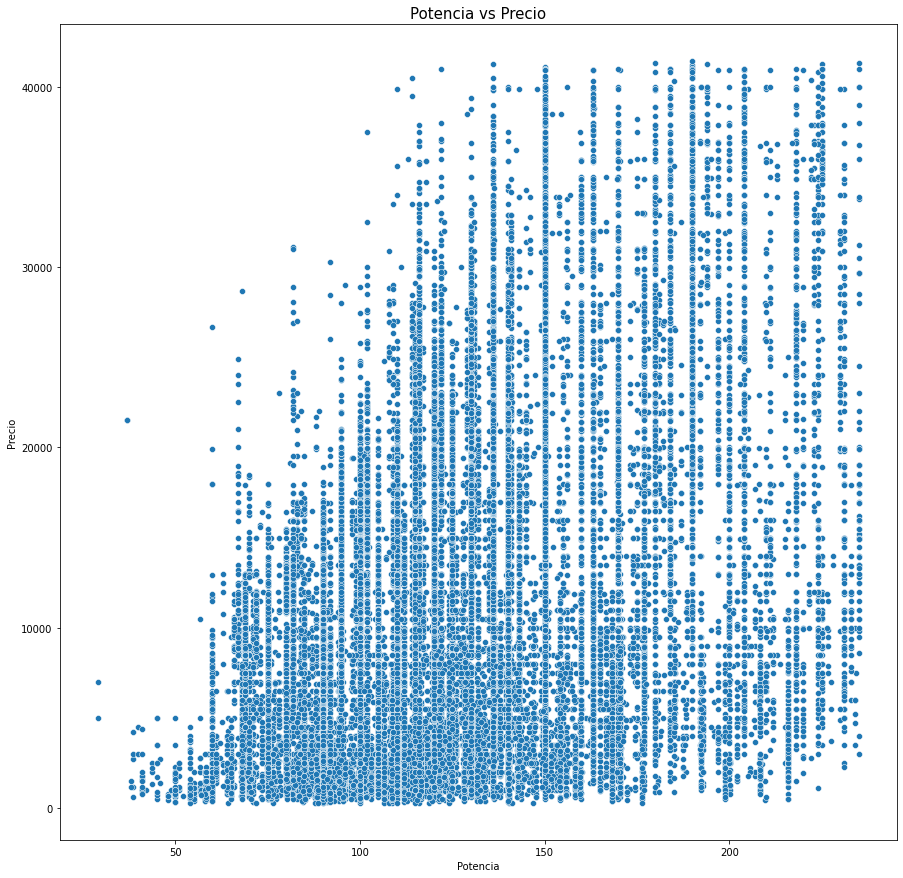

In [67]:
plt.figure(figsize=(15,15),facecolor='w');
plt.title('Potencia vs Precio', fontsize=15);
plt.ylabel('Precio')
plt.xlabel('Potencia')
sns.scatterplot(x=df_so_fil.Potencia,y=df_so_fil.Precio);

En el caso del precio en función de la potencia, podemos ver cierta relación como ya hemos visto en la tabla, pero no queda tan claro como en el caso de precio-kilómetros

* Combustible - Precio

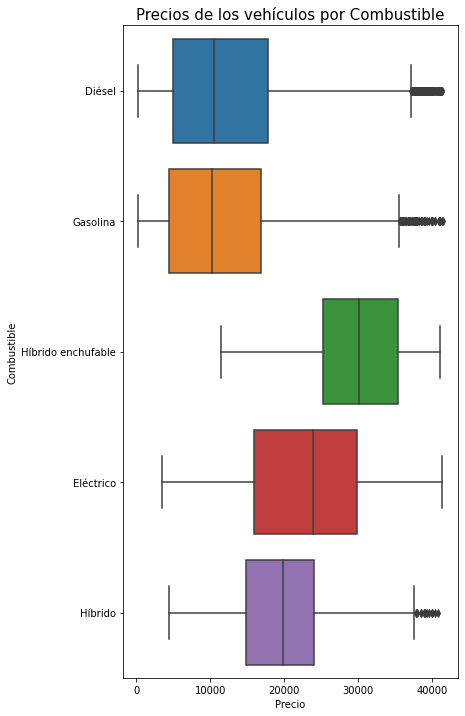

In [68]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Precios de los vehículos por Combustible', fontsize=15)
plt.ylabel('Combustible', fontsize=10)
plt.xlabel('Precio', fontsize=10)
sns.boxplot(y=df_so_fil.Combustible, x=df_so_fil.Precio);
plt.savefig('./imagenes/comb_vs_precio.png')

De manera general, los coches hibridos y electricos son más caros que los diésel o gasolina, más adelantes también investigaremos cual puede ser la causa

* Comunidad Autónoma - Precio

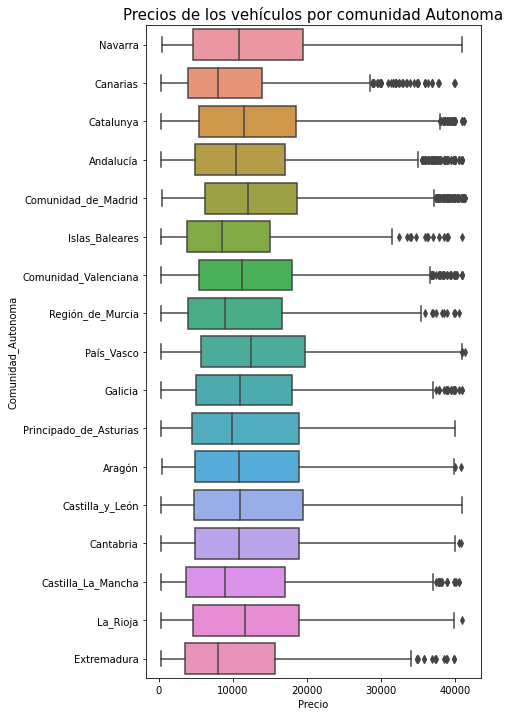

In [69]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Precios de los vehículos por comunidad Autonoma', fontsize=15)
plt.ylabel('Comunidad Autonoma', fontsize=10)
plt.xlabel('Precio', fontsize=10)
sns.boxplot(y=df_so_fil.Comunidad_Autonoma, x=df_so_fil.Precio);
plt.savefig('./imagenes/com_aut_vs_precio.png')

Sobre la gráfica, la mayor parte de las comunidades tiene una media de precios similar

* Vendedor profesional - Precio

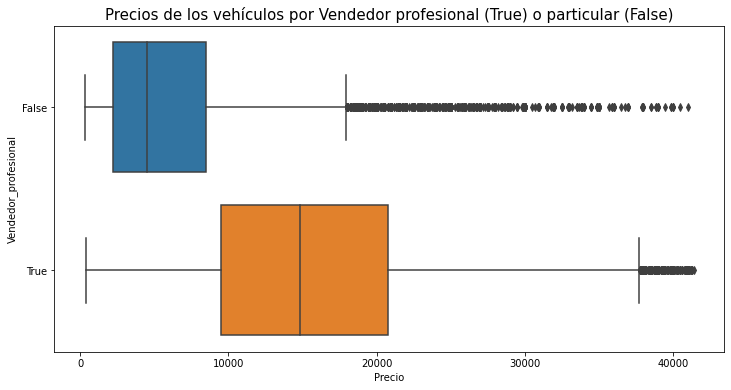

In [70]:
plt.figure(figsize=(12,6),facecolor='w');
plt.title('Precios de los vehículos por Vendedor profesional (True) o particular (False)', fontsize=15)
plt.ylabel('Vendedor Profesional', fontsize=10)
plt.xlabel('Precio', fontsize=10)
sns.boxplot(y=df_so_fil.Vendedor_profesional, x=df_so_fil.Precio);
plt.savefig('./imagenes/vendedor_vs_precio.png')

Los precios de los vehículos vendidos por profesionales son mayor que los precios de los vehículos vendidos por particulares

* Marca-Precio

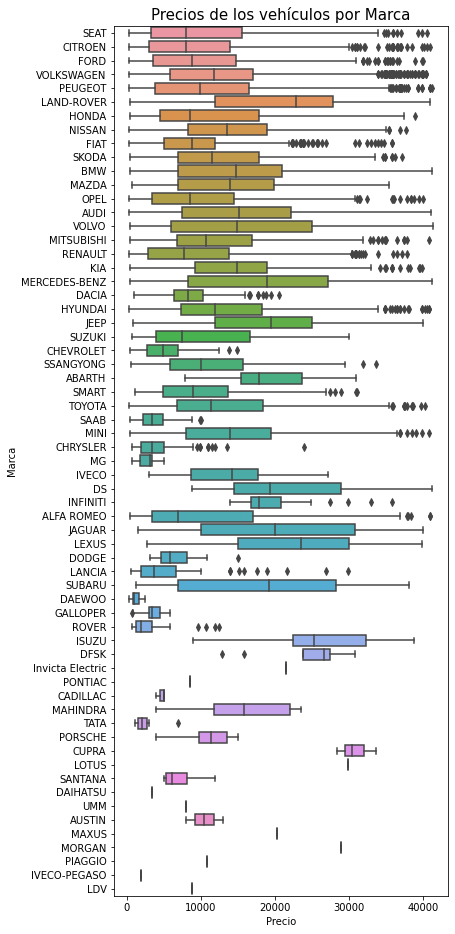

In [71]:
plt.figure(figsize=(6,16),facecolor='w');
plt.title('Precios de los vehículos por Marca', fontsize=15)
plt.ylabel('Marca', fontsize=10)
plt.xlabel('Precio', fontsize=10)
sns.boxplot(y=df_so_fil.Marca, x=df_so_fil.Precio);
plt.savefig('./imagenes/marca_precio.png')
plt.savefig('./imagenes/marca_vs_precio.png')


Existen grandes diferencias de precios entre las marcas a la venta

# 5. Resultados

## Contraste de hipótesis

* Los vehículos con más kilometros son los más baratos

Como hemos visto en la grafica de relación entre Precio y Kilómetros podríamos decir que sí, los vehículos con más kilometros son los más baratos.\
Para poder afinar más el resultado, podríamos mostrar en ese mismo gráfico como se reparten los puntos en función del combustible o de la marca

Mostramos el gráfico kilómetros-precio por cada una de los combustibles (en un solo gráfico no queda clara la tendencia ya que hay muchso puntos que se superponen)

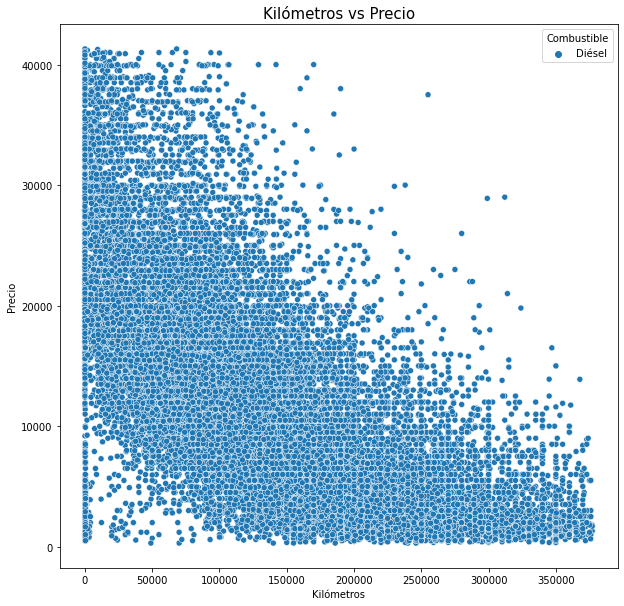

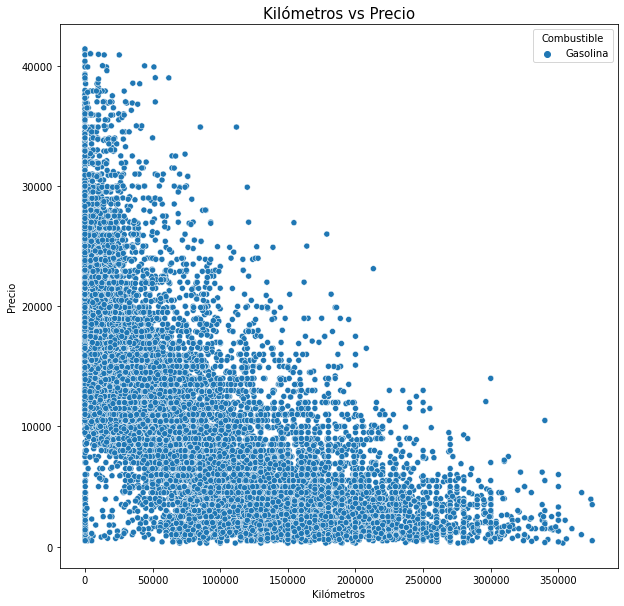

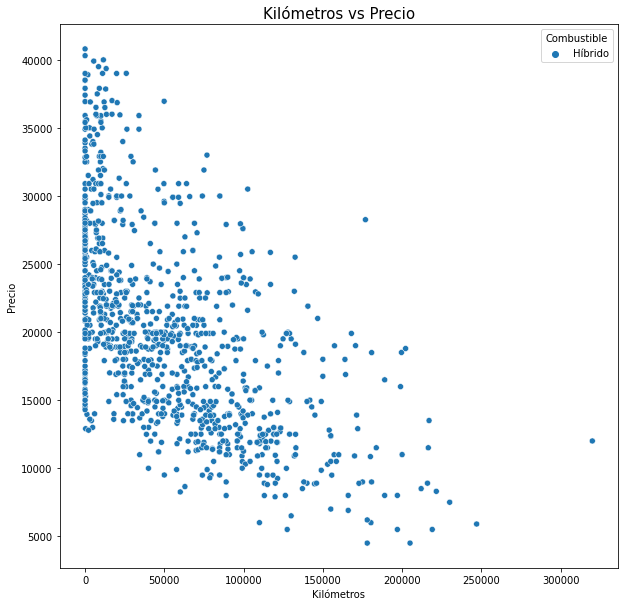

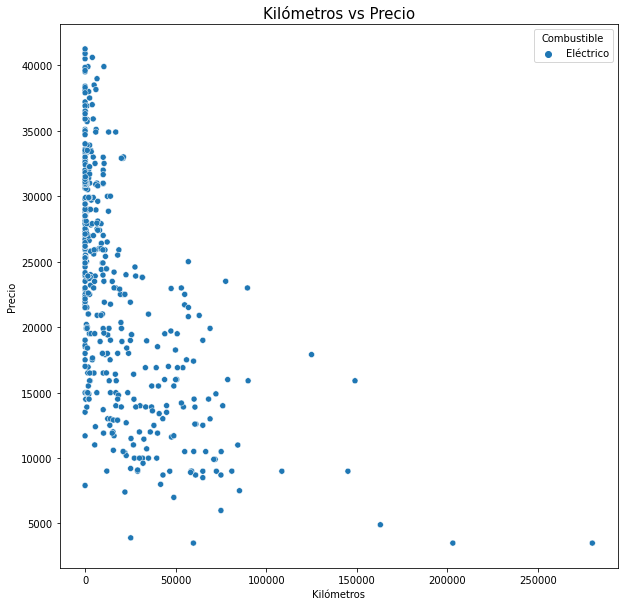

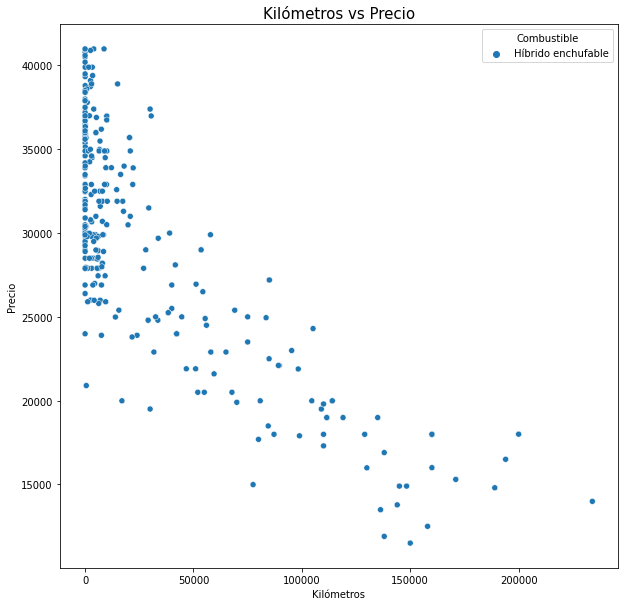

In [72]:
for i in df_so_fil.Combustible.value_counts().index:
    plt.figure(figsize=(10,10),facecolor='w');
    plt.title('Kilómetros vs Precio', fontsize=15);
    plt.ylabel('Precio')
    plt.xlabel('Kilómetros')
    sns.scatterplot(x=df_so_fil.Kilometros,y=df_so.Precio, hue=df_so_fil.Combustible[df_so_fil.Combustible == i]);

Vemos que los vehículos bajan de precio segun aumentan de kilometros independeintemente del combustible

Ahora mostramos el gráfico Kilometros-Precio en función de la Marca

Creamos una lista con las 10 marcas más vendidas

In [73]:
lista_marcas_top = df_so.Marca.value_counts().index[:10]

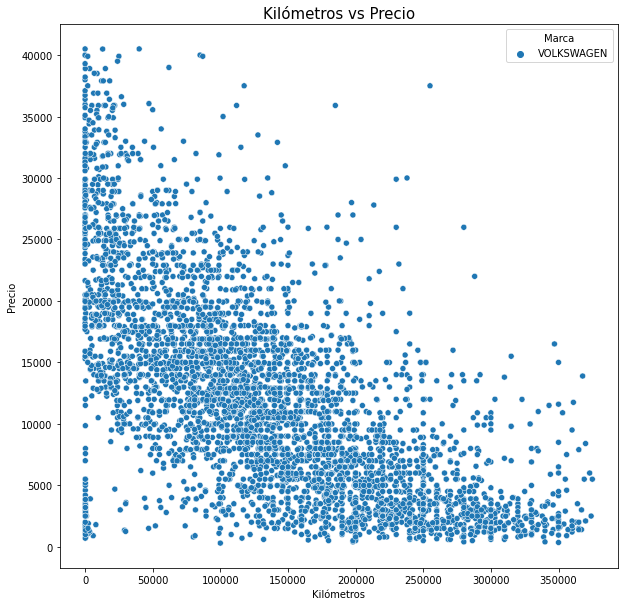

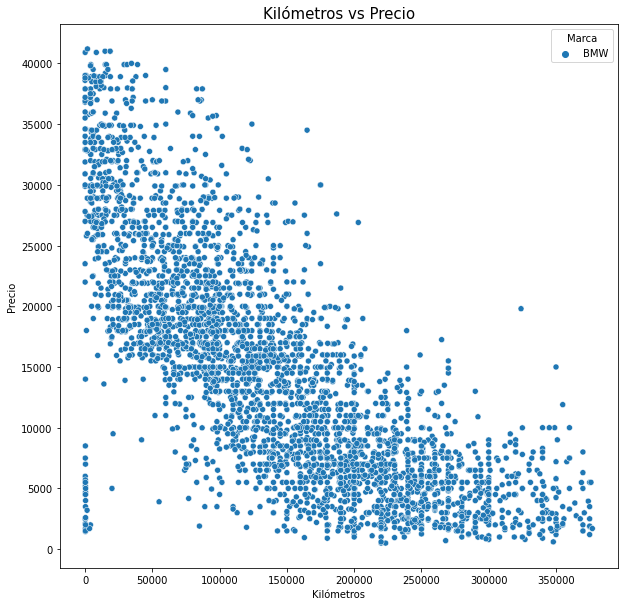

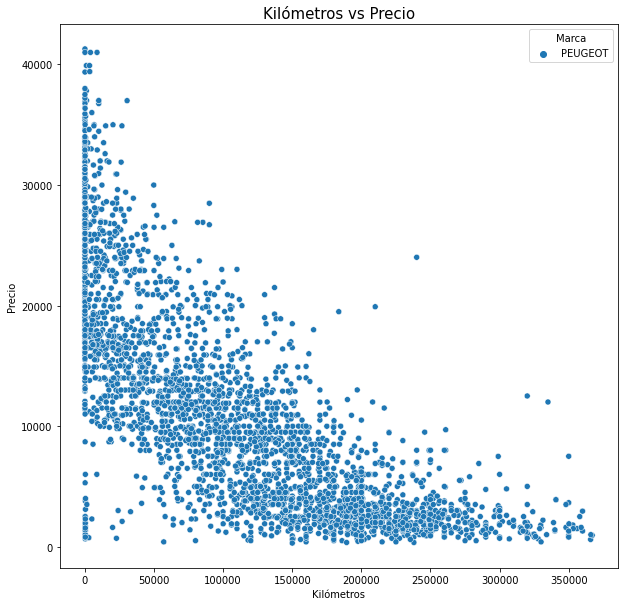

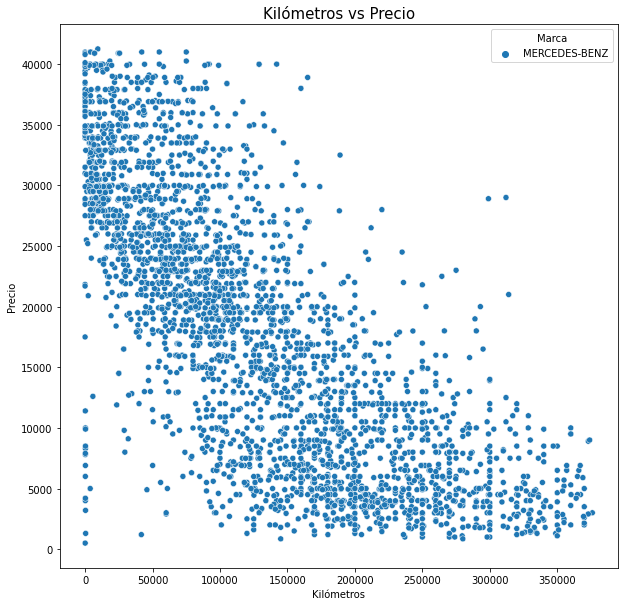

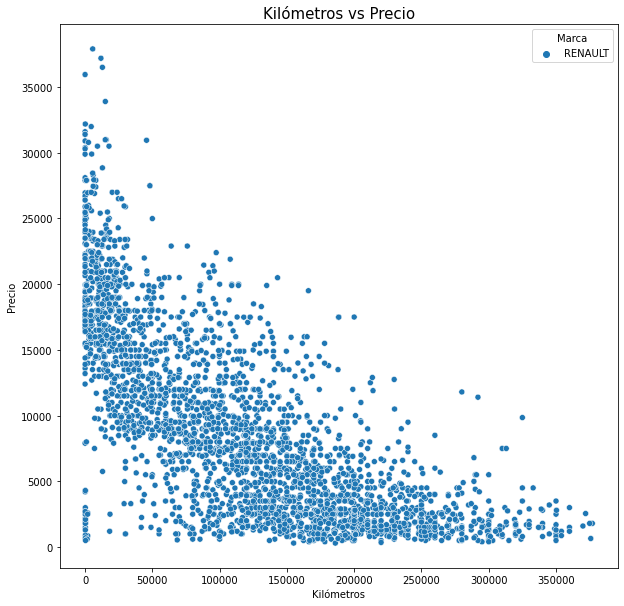

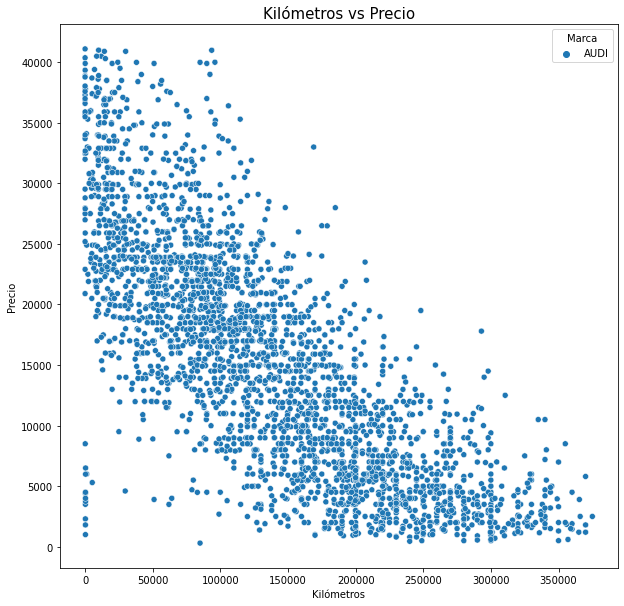

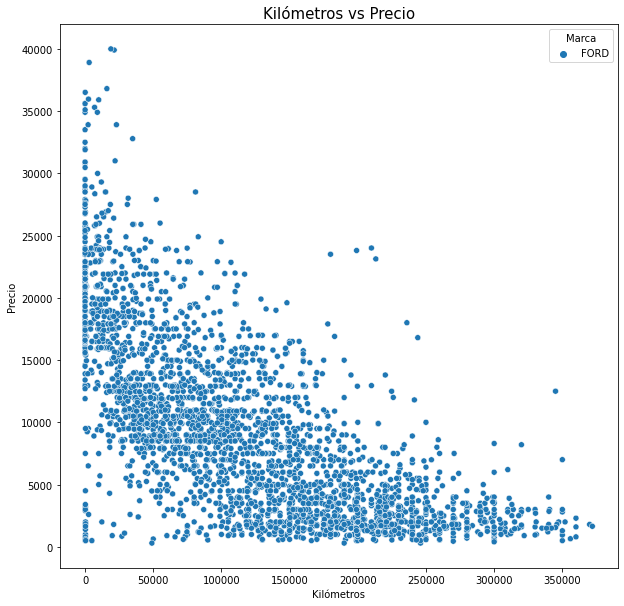

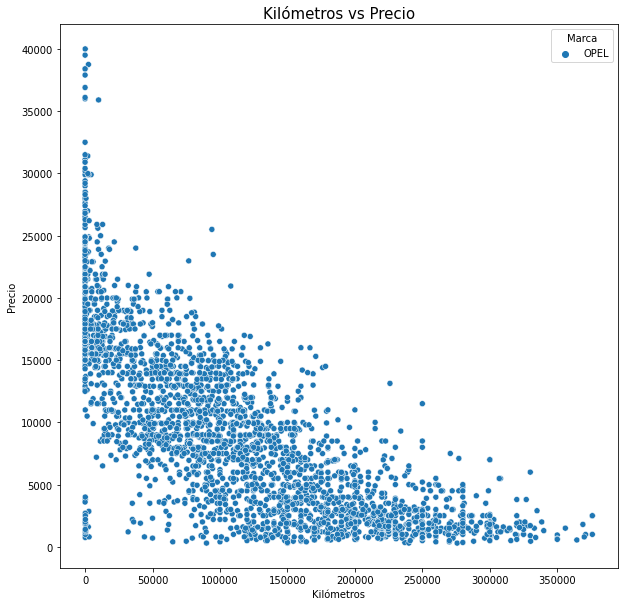

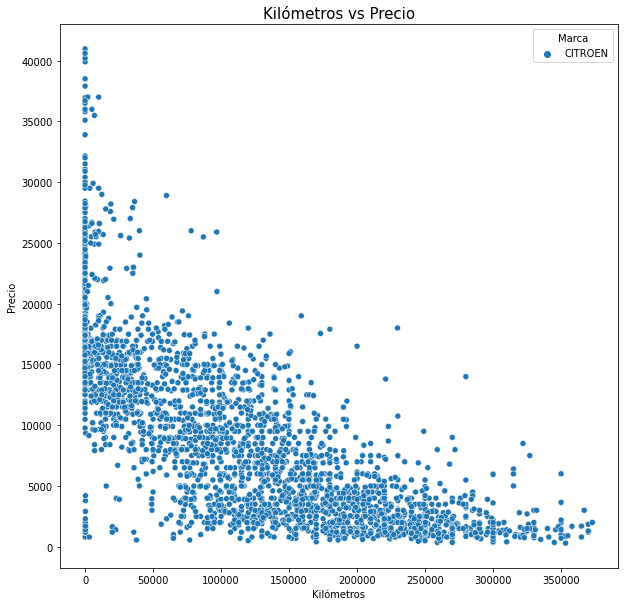

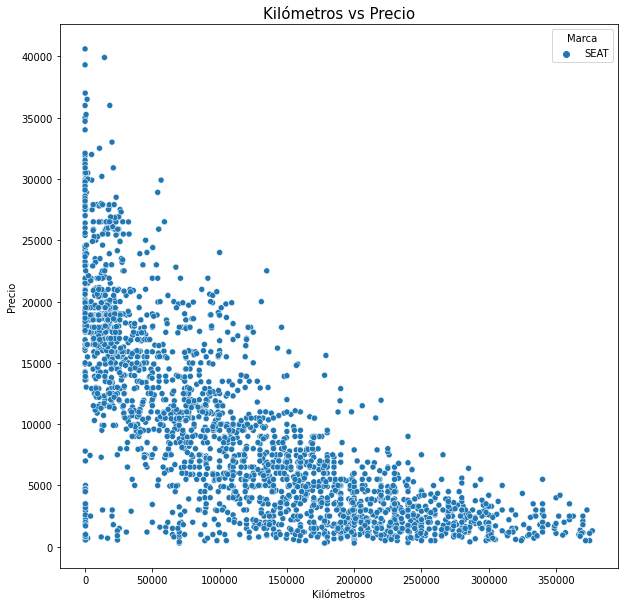

In [74]:
for i in lista_marcas_top:
    plt.figure(figsize=(10,10),facecolor='w');
    plt.title('Kilómetros vs Precio', fontsize=15);
    plt.ylabel('Precio')
    plt.xlabel('Kilómetros')
    sns.scatterplot(x=df_so_fil.Kilometros,y=df_so.Precio, hue=df_so_fil.Marca[df_so_fil.Marca == i]);

Sobre las gráficas podemos ver que el precio disminuye a medida que aumentan los kilometros independientemente del combustible o de la marca, por lo que quedaría confirmada la hipótesis

* Marca de coches más barata es Dacia

In [75]:
pd.set_option('display.max_row',64)

In [76]:
df_so_fil[['Marca','Precio']].groupby(
    by=["Marca"],axis=0).mean()


Precio
Marca                         
ABARTH            19098.333333
ALFA ROMEO        11096.563433
AUDI              15500.696545
AUSTIN            10500.000000
BMW               15052.394009
CADILLAC           4666.666667
CHEVROLET          5098.808824
CHRYSLER           4194.940171
CITROEN            9182.084132
CUPRA             30866.666667
DACIA              8401.571970
DAEWOO             1264.761905
DAIHATSU           3500.000000
DFSK              24421.625000
DODGE              6515.000000
DS                22397.168142
FIAT               9063.568598
FORD               9968.622060
GALLOPER           3451.900000
HONDA             11725.033186
HYUNDAI           13127.271020
INFINITI          19392.740741
ISUZU             25769.500000
IVECO             13874.613636
IVECO-PEGASO       2000.000000
Invicta Electric  21495.000000
JAGUAR            20443.885246
JEEP              19115.423237
KIA               14698.368326
LANCIA             6156.413793
LAND-ROVER        20958.178683
LDV                8900.000000
LEXUS             22337.626214
LOTUS             29850.000000
MAHINDRA          16044.545455
MAXUS             20290.000000
MAZDA             14139.688699
MERCEDES-BENZ     18497.299871
MG                 2757.142857
MINI              14575.372208
MITSUBISHI        12736.753086
MORGAN            29000.000000
NISSAN            13767.130215
OPEL               9456.384777
PEUGEOT           11341.076170
PIAGGIO           10900.000000
PONTIAC            8500.000000
PORSCHE           11058.750000
RENAULT            8962.734395
ROVER              3313.903226
SAAB               3896.028571
SANTANA            7349.750000
SEAT               9859.030998
SKODA             12509.305709
SMART              9945.802083
SSANGYONG         11404.238318
SUBARU            18625.575000
SUZUKI            10996.236515
TATA               2516.800000
TOYOTA            12682.558476
UMM                8000.000000
VOLKSWAGEN        12529.538285
VOLVO             16940.910426

In [77]:
df_so_fil[df_so_fil.Marca.isin(['DAEWOO','TATA','MG','ROVER','DAIHATSU','SAAB','LANCIA','CHRISLER','DACIA'])][['Marca','Anyo']].groupby(
    by=["Marca"],axis=0).mean()

Empty DataFrame
Columns: []
Index: [DACIA, DAEWOO, DAIHATSU, LANCIA, MG, ROVER, SAAB, TATA]

In [78]:
pd.crosstab(df_so_fil['Anyo'],df_so_fil[df_so_fil.Marca.isin(['DAEWOO','TATA','MG','ROVER','DAIHATSU','SAAB','LANCIA','CHRISLER','DACIA'])]['Marca'], margins=True)

Marca   DACIA  DAEWOO  DAIHATSU  LANCIA  MG  ROVER  SAAB  TATA  All
Anyo                                                               
1982.0      0       0         0       1   0      0     0     0    1
1986.0      0       0         0       0   0      1     0     0    1
1989.0      0       0         0       2   0      0     0     0    2
1992.0      0       0         0       1   0      0     0     0    1
1993.0      0       0         0       0   0      1     0     0    1
1994.0      0       0         0       1   0      1     0     0    2
1995.0      0       0         0       0   0      2     0     0    2
1996.0      0       0         0       1   1      2     0     0    4
1997.0      0       2         0       1   0      3     0     0    6
1998.0      0       1         0       1   1      4     1     0    8
1999.0      0       3         0       0   0      0     0     0    3
2000.0      0       7         1       1   1      2     2     0   14
2001.0      0       7         0       0   1      4     3     0   15
2002.0      0       5         0       0   2      4     6     1   18
2003.0      0       5         0       1   0      0     3     0    9
2004.0      0      11         0       9   0      5     5     0   30
2005.0      0       1         0       1   1      2     7     0   12
2006.0      3       0         0       6   0      0     9     0   18
2007.0      5       0         0       3   0      0    17     2   27
2008.0      3       0         0       6   0      0     9     1   19
2009.0      6       0         0       3   0      0     7     2   18
2010.0      6       0         0       1   0      0     0     1    8
2011.0      7       0         0       2   0      0     1     1   11
2012.0     10       0         0       3   0      0     0     1   14
2013.0     15       0         0       4   0      0     0     0   19
2014.0     38       0         0       4   0      0     0     0   42
2015.0     32       0         0       6   0      0     0     1   39
2016.0     40       0         0       0   0      0     0     0   40
2017.0     31       0         0       0   0      0     0     0   31
2018.0     31       0         0       0   0      0     0     0   31
2019.0     17       0         0       0   0      0     0     0   17
2020.0     18       0         0       0   0      0     0     0   18
2021.0      2       0         0       0   0      0     0     0    2
All       264      42         1      58   7     31    70    10  483

La marca más barata sería Daewoo con un precio medio de 1264€ por lo que rechazamos la hipótesis. La marca Dacia no es de las marcas que menos coches tiene a la venta y no tiene vehículos tan antiguos por los que no ocupa no los primeros puestos en cuanto a marca barata

In [79]:
df_so_fil[df_so_fil.Marca =='DACIA'].Marca.value_counts()

DACIA    264
Name: Marca, dtype: int64

In [80]:
df_so_fil[df_so_fil.Marca =='DACIA'].Anyo.value_counts()

2016.0    40
2014.0    38
2015.0    32
2018.0    31
2017.0    31
2020.0    18
2019.0    17
2013.0    15
2012.0    10
2011.0     7
2010.0     6
2009.0     6
2007.0     5
2006.0     3
2008.0     3
2021.0     2
Name: Anyo, dtype: int64

* Los vehículos híbridos son más caros que los diésel

Como hemos visto en el análisis bivariante, los vehículos híbridos son de manera genera más caros que los vehículos diésel pero en este caso si mostramos los kilómetros que tienen de media los vehículos Diésel son mucho mayores que los que tienen los híbridos y como hemos visto justo antes, esos kilómetros si que afectan al precio

En la siguiente tabla podemos ver la media de kilómetros de los vehículos por tipo de combustible

In [81]:
df_so_fil[['Combustible','Kilometros']].groupby(
    by=["Combustible"],axis=0).mean()

Kilometros
Combustible                      
Diésel              135113.120316
Eléctrico            16975.347023
Gasolina             83224.269958
Híbrido              51100.834742
Híbrido enchufable   28777.942953

Para poder hacer una comparativa más justa, vamos a filtrar cual es el rango de kilómetros y potencia sobre los que encontramos la mayor parte de los vehículos híbridos y realizaremos la comparación hibrido-Diesel sobre ese rango

In [82]:
df_so_fil[df_so_fil.Combustible == 'Diésel'].describe()

Precio     Kilometros      Potencia
count  28367.000000   28367.000000  28367.000000
mean   12304.042655  135113.120316    131.361474
std     8826.831686   85963.051561     33.769548
min      300.000000       0.000000     41.000000
25%     4990.000000   69999.500000    110.000000
50%    10500.000000  125000.000000    128.461840
75%    17850.000000  195000.000000    150.000000
max    41300.000000  377000.000000    235.000000

In [83]:
df_so_fil[df_so_fil.Combustible == 'Híbrido'].describe()

Precio     Kilometros     Potencia
count   1065.000000    1065.000000  1065.000000
mean   20228.023474   51100.834742   146.889202
std     6990.942166   49216.329186    36.108532
min     4499.000000       0.000000    70.000000
25%    14900.000000    9385.000000   122.000000
50%    19800.000000   40000.000000   136.000000
75%    23990.000000   80325.000000   184.000000
max    40795.000000  320000.000000   231.000000

Tomaremos los valores en engloben alrededor del 75% de los datos

In [84]:
filtro_hibridos = (df_so_fil.Kilometros<100000)&(df_so_fil.Potencia<200)

In [85]:
df_so_fil_hib = df_so_fil[filtro_hibridos]

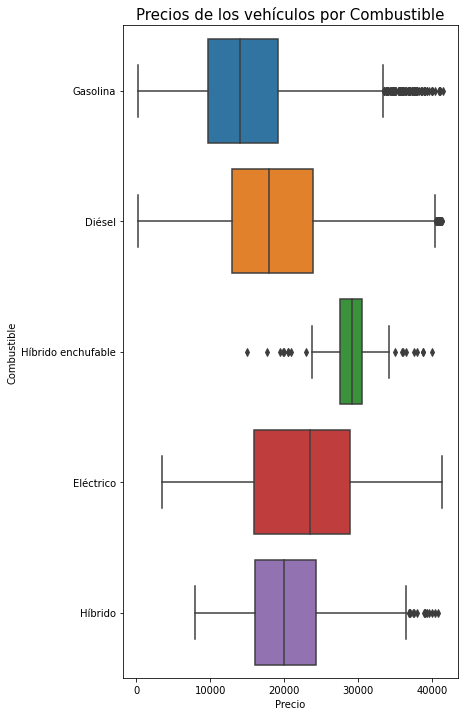

In [86]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Precios de los vehículos por Combustible', fontsize=15)
plt.ylabel('Combustible', fontsize=10)
plt.xlabel('Precio', fontsize=10)
sns.boxplot(y=df_so_fil_hib.Combustible, x=df_so_fil_hib.Precio);

Sobre el nuevo gráfico vemos ahora que las distribuciones de precio por combustibles son mucho más parecidas. Para poder confirmar que estadísticamente no existe igualdad en las medias de precios aplicaremos el test anova sobre el precio en las diferentes categorías de combustible.

Como hemos visto en el análisis univariante, la variable precio, no sigue una distribución normal por lo que no podemos aplicar anova directamente, lo aplicaremos por medio del teorema central del límite

Se ha creado una función que aplica el teorema tomando 100 muestras de la media de 30 valores y sobre esa nueva variable se aplica Anova (oneway de scipy), la función se llama ``teorema_central_limite``

In [87]:
fn.teorema_central_limite(df_so_fil_hib,'Combustible','Precio')

Diésel   Gasolina    Híbrido  Eléctrico  \
Diésel                      X          X          X          X   
Gasolina            Distintas          X          X          X   
Híbrido             Distintas  Distintas          X          X   
Eléctrico           Distintas  Distintas  Distintas          X   
Híbrido enchufable  Distintas  Distintas  Distintas  Distintas   

                   Híbrido enchufable  
Diésel                              X  
Gasolina                            X  
Híbrido                             X  
Eléctrico                           X  
Híbrido enchufable                  X

Obtenemos que ninguna de las medias de precios son iguales estadisticamente

In [88]:
df_so_fil_hib[['Combustible','Precio']].groupby(
    by=["Combustible"],axis=0).mean()

Precio
Combustible                     
Diésel              18687.179151
Eléctrico           22558.332589
Gasolina            14941.818792
Híbrido             20891.950423
Híbrido enchufable  28891.648936

Con los valores de la tabla podemos confirmar la hipótesis de la media de precios de los vehículos híbridos es mayor que la de los vehículos de diésel

Para dar más información sobre las posibles causas de las diferencias en precio (utilizando los datos que nos ofrece el dataset) vamos a realizar el test chi2 sobre las variables categóricas del df. Como hemos visto en los análisis bivariante, el precio es distinto en función de la Marca, del vendedor, del año.... si el test chi2 nos confirma que las variables categoricas no son independientes, podríamos decir que ese reparto de las categorias en los distintos combustibles no va a ser el mismo, por lo que no estamos repartiendo el precio de la misma manera en todos los combustibles. Por supuesto habrá más causas (como precio nuevo del vehículo, estado general, valoración personal) que hagan que el precio pueda ser distinto en función del combustible

El test de $\chi^2$ se bassa en la fórmula:
$$\sum\cfrac{(observaciones_i - Esperado_i)^2}{Esperado_i}$$

In [89]:
fn.chi2(df_so_fil,ls.cat_var)

hay dependencia entre las columnas Marca,Combustible
hay dependencia entre las columnas Marca,Anyo
hay dependencia entre las columnas Marca,Vendedor_profesional
hay dependencia entre las columnas Marca,Comunidad_Autonoma
hay dependencia entre las columnas Combustible,Anyo
hay dependencia entre las columnas Combustible,Vendedor_profesional
hay dependencia entre las columnas Combustible,Comunidad_Autonoma
hay dependencia entre las columnas Anyo,Vendedor_profesional
hay dependencia entre las columnas Anyo,Comunidad_Autonoma
hay dependencia entre las columnas Vendedor_profesional,Comunidad_Autonoma


Todas las variables categóricas son dependientes lo que, en este caso, quiere decir que no hay un reparto equitativo del número vehículos a la venta entre las diferentes categorías en función del combustible.

Como ejemplo muestro la tabla de reparto de vehículos según la marca para cada tipo de combustible

In [90]:
pd.crosstab(df_so_fil['Combustible'],df_so_fil['Marca'], margins=True)

Marca               ABARTH  ALFA ROMEO  AUDI  AUSTIN   BMW  CADILLAC  \
Combustible                                                            
Diésel                   0         206  2291       0  2829         3   
Eléctrico                0           0     0       0    41         0   
Gasolina                96          62   752       2   615         0   
Híbrido                  0           0     0       0     0         0   
Híbrido enchufable       0           0    25       0    20         0   
All                     96         268  3068       2  3505         3   

Marca               CHEVROLET  CHRYSLER  CITROEN  CUPRA  ...  SMART  \
Combustible                                              ...          
Diésel                     85        72     1939      0  ...     16   
Eléctrico                   0         0       18      0  ...     51   
Gasolina                  118        45      839      3  ...    125   
Híbrido                     0         0        2      0  ...      0   
Híbrido enchufable          1         0       19      0  ...      0   
All                       204       117     2817      3  ...    192   

Marca               SSANGYONG  SUBARU  SUZUKI  TATA  TOYOTA  UMM  VOLKSWAGEN  \
Combustible                                                                    
Diésel                    185      14      67     3     534    1        3039   
Eléctrico                   0       0       0     0       3    0          23   
Gasolina                   29      63     146     7     419    0        1232   
Híbrido                     0       3      28     0     566    0           8   
Híbrido enchufable          0       0       0     0       0    0          47   
All                       214      80     241    10    1522    1        4349   

Marca               VOLVO    All  
Combustible                       
Diésel                561  28367  
Eléctrico               0    487  
Gasolina              120  14380  
Híbrido                 0   1065  
Híbrido enchufable      0    298  
All                   681  44597  

[6 rows x 64 columns]

Podemos observar que mientras que Gaolina y Diesel tienen vehículos a la venta de la mayoría de las marcas, las marcas con vehículos híbridos son bastante reducidas (y podrían ser las marcas más caras)

* Media de precios igual para todas las comunidades autonomas

Al igual que en la hipótesis anterior, en este caso utilizaremos el teorema central del limite para comparar las medias de precios de las comunidades autónomas

In [91]:
fn.teorema_central_limite(df_so_fil,'Comunidad_Autonoma','Precio')

Comunidad_de_Madrid  Andalucía       Catalunya  \
Comunidad_de_Madrid                      X          X               X   
Andalucía                        Distintas          X               X   
Catalunya                        Distintas  Distintas               X   
Comunidad_Valenciana             Distintas  Distintas  Medias iguales   
Galicia                          Distintas  Distintas  Medias iguales   
Castilla_y_León             Medias iguales  Distintas  Medias iguales   
País_Vasco                  Medias iguales  Distintas       Distintas   
Canarias                         Distintas  Distintas       Distintas   
Castilla_La_Mancha               Distintas  Distintas       Distintas   
Región_de_Murcia                 Distintas  Distintas       Distintas   
Aragón                           Distintas  Distintas  Medias iguales   
Extremadura                      Distintas  Distintas       Distintas   
Principado_de_Asturias           Distintas  Distintas  Medias iguales   
Islas_Baleares                   Distintas  Distintas       Distintas   
Navarra                     Medias iguales  Distintas  Medias iguales   
Cantabria                   Medias iguales  Distintas  Medias iguales   
La_Rioja                    Medias iguales  Distintas  Medias iguales   

                       Comunidad_Valenciana         Galicia Castilla_y_León  \
Comunidad_de_Madrid                       X               X               X   
Andalucía                                 X               X               X   
Catalunya                                 X               X               X   
Comunidad_Valenciana                      X               X               X   
Galicia                      Medias iguales               X               X   
Castilla_y_León                   Distintas  Medias iguales               X   
País_Vasco                        Distintas       Distintas       Distintas   
Canarias                          Distintas       Distintas       Distintas   
Castilla_La_Mancha                Distintas       Distintas       Distintas   
Región_de_Murcia                  Distintas       Distintas       Distintas   
Aragón                       Medias iguales  Medias iguales       Distintas   
Extremadura                       Distintas       Distintas       Distintas   
Principado_de_Asturias       Medias iguales  Medias iguales       Distintas   
Islas_Baleares                    Distintas       Distintas       Distintas   
Navarra                           Distintas       Distintas  Medias iguales   
Cantabria                         Distintas  Medias iguales  Medias iguales   
La_Rioja                          Distintas  Medias iguales  Medias iguales   

                       País_Vasco   Canarias Castilla_La_Mancha  \
Comunidad_de_Madrid             X          X                  X   
Andalucía                       X          X                  X   
Catalunya                       X          X                  X   
Comunidad_Valenciana            X          X                  X   
Galicia                         X          X                  X   
Castilla_y_León                 X          X                  X   
País_Vasco                      X          X                  X   
Canarias                Distintas          X                  X   
Castilla_La_Mancha      Distintas  Distintas                  X   
Región_de_Murcia        Distintas  Distintas     Medias iguales   
Aragón                  Distintas  Distintas          Distintas   
Extremadura             Distintas  Distintas          Distintas   
Principado_de_Asturias  Distintas  Distintas          Distintas   
Islas_Baleares          Distintas  Distintas          Distintas   
Navarra                 Distintas  Distintas          Distintas   
Cantabria               Distintas  Distintas          Distintas   
La_Rioja                Distintas  Distintas          Distintas   

                       Región_de_Murcia          Aragón     Extremadura  \
Com

In [94]:
df_so_fil[['Comunidad_Autonoma','Precio']].groupby(
    by=["Comunidad_Autonoma"],axis=0).mean()

Precio
Comunidad_Autonoma                  
Andalucía               11940.173798
Aragón                  12633.891269
Canarias                 9773.995255
Cantabria               13001.937378
Castilla_La_Mancha      11449.614922
Castilla_y_León         13115.846797
Catalunya               12904.156003
Comunidad_Valenciana    12661.341993
Comunidad_de_Madrid     13317.503201
Extremadura             10350.598344
Galicia                 12559.050394
Islas_Baleares          10345.343419
La_Rioja                13048.347826
Navarra                 13040.533217
País_Vasco              13730.493276
Principado_de_Asturias  12292.110226
Región_de_Murcia        11110.585680

No tenemos las mismas medias de precios en todas las comunidades, se descarta la hipótesis de las medias son iguales para todas las comunidades autonomas

Por la misma razón que en el apartado anterior, y con el test chi2 que se ha hecho anteriormente, sabemos que las variables categóricas no son indiendientes, como ejemplo:

In [ ]:
pd.crosstab(df_so_fil['Comunidad_Autonoma'],df_so_fil['Combustible'],margins=True)

Combustible             Diésel  Eléctrico  Gasolina  Híbrido  \
Comunidad_Autonoma                                             
Andalucía                 5261         45      2061      128   
Aragón                     799         14       360       35   
Canarias                   593          9      1051       24   
Cantabria                  347          3       149        7   
Castilla_La_Mancha        1195         19       409       21   
Castilla_y_León           1361         34       673       64   
Catalunya                 3987         86      2657      182   
Comunidad_Valenciana      3512         47      1954       82   
Comunidad_de_Madrid       5400        132      2499      320   
Extremadura                746          9       192       14   
Galicia                   1572         25       603       65   
Islas_Baleares             302          4       352        3   
La_Rioja                   179          1        86        8   
Navarra                    425          3       128       13   
País_Vasco                1347         31       635       50   
Principado_de_Asturias     484         13       230       20   
Región_de_Murcia           857         12       341       29   
All                      28367        487     14380     1065   

Combustible             Híbrido enchufable    All  
Comunidad_Autonoma                                 
Andalucía                               31   7526  
Aragón                                   6   1214  
Canarias                                 9   1686  
Cantabria                                5    511  
Castilla_La_Mancha                      18   1662  
Castilla_y_León                         22   2154  
Catalunya                               43   6955  
Comunidad_Valenciana                    25   5620  
Comunidad_de_Madrid                     83   8434  
Extremadura                              5    966  
Galicia                                 17   2282  
Islas_Baleares                           0    661  
La_Rioja                                 2    276  
Navarra                                  3    572  
País_Vasco                              19   2082  
Principado_de_Asturias                   6    753  
Región_de_Murcia                         4   1243  
All                                    298  44597

La comunidad de Madrid tiene más de el doble de vehículos Híbridos enchufables a la venta que Andalucia pero el numero de vehículos totales de cada comunidad es muy parecido

Mostramos los precios medios por coumnidad autonoma:\
    * La más cara sería Pais Vasco y la más barata sería Canarias

In [ ]:
df_so_fil[['Comunidad_Autonoma','Precio']].groupby(
    by=["Comunidad_Autonoma"],axis=0).mean()


Precio
Comunidad_Autonoma                  
Andalucía               11940.173798
Aragón                  12633.891269
Canarias                 9773.995255
Cantabria               13001.937378
Castilla_La_Mancha      11449.614922
Castilla_y_León         13115.846797
Catalunya               12904.156003
Comunidad_Valenciana    12661.341993
Comunidad_de_Madrid     13317.503201
Extremadura             10350.598344
Galicia                 12559.050394
Islas_Baleares          10345.343419
La_Rioja                13048.347826
Navarra                 13040.533217
País_Vasco              13730.493276
Principado_de_Asturias  12292.110226
Región_de_Murcia        11110.585680

* Los vehículos vendidos por profesionales son más caros que los vendidos por particulares

Por lo que hemos visto en el análisis bivariante, podemos confirmar la hipótesis ya que los vehículos vendidos por profesionales son más caros que los vendidos por particulares

In [ ]:
df_so_fil_hib[['Vendedor_profesional','Precio']].groupby(
    by=["Vendedor_profesional"],axis=0).mean()

Precio
Vendedor_profesional              
False                 11633.316904
True                  18238.428837

In [ ]:
pd.crosstab(df_so_fil['Vendedor_profesional'],df_so_fil['Combustible'],margins=True)

Combustible           Diésel  Eléctrico  Gasolina  Híbrido  \
Vendedor_profesional                                         
False                  10635         23      4886       92   
True                   17732        464      9494      973   
All                    28367        487     14380     1065   

Combustible           Híbrido enchufable    All  
Vendedor_profesional                             
False                                 21  15657  
True                                 277  28940  
All                                  298  44597

Se puede ver en la tabla que hay más proporción de vehículos Híbridos, Eléctricos e Híbridos enchufables vendidos por profesioanles y como ya hemos visto antes, estos vehículos son más caros, lo que podría ser una de las causas que explique esta diferencia de precios

- Los vehículos más potentes son los más caros

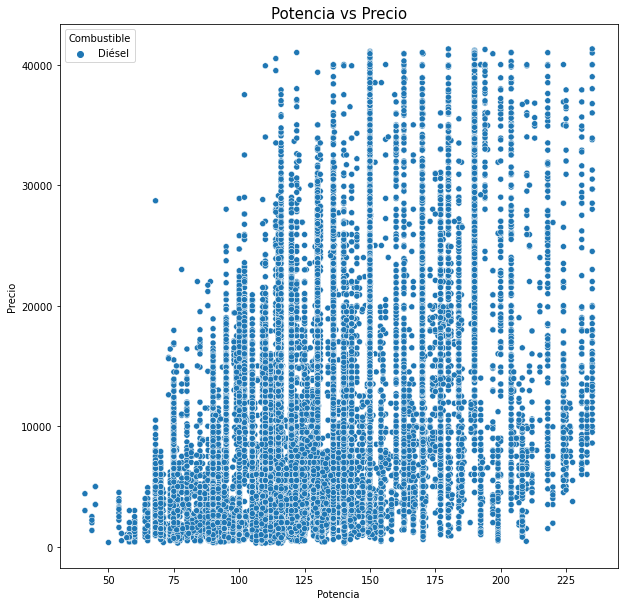

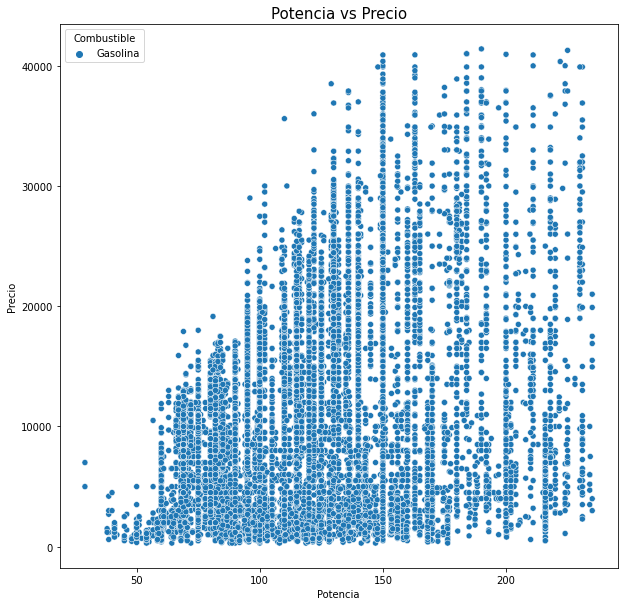

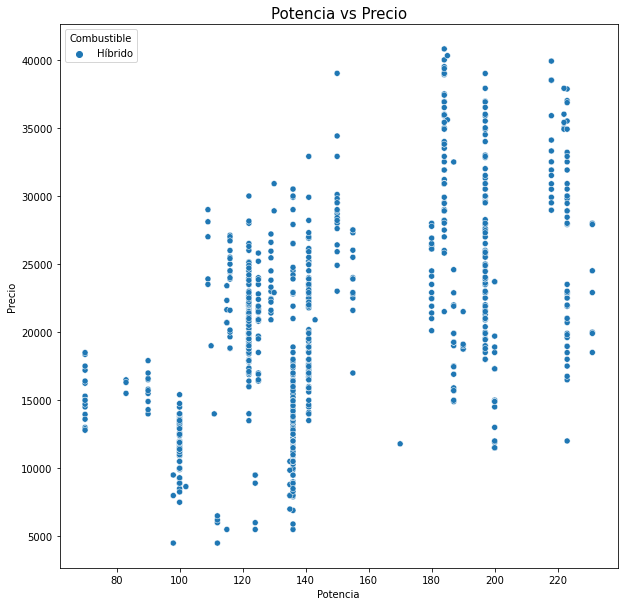

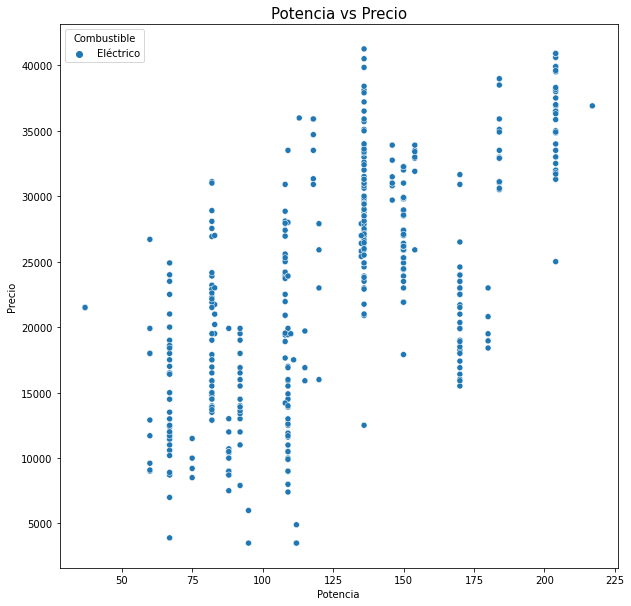

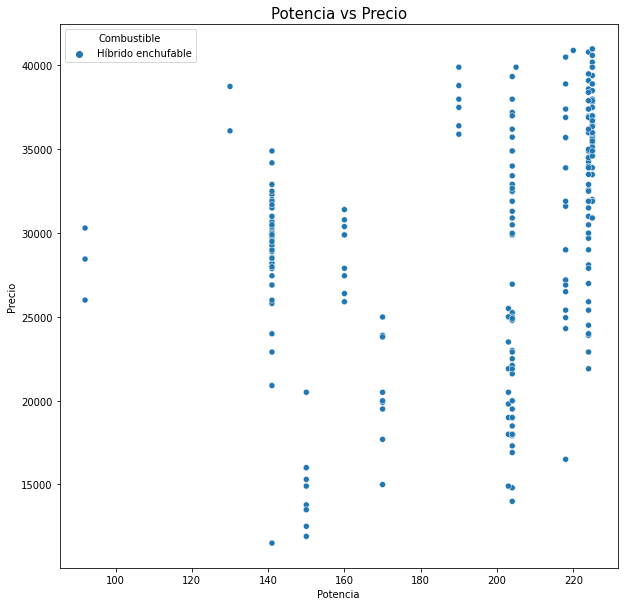

In [ ]:
for i in df_so_fil.Combustible.value_counts().index:
    plt.figure(figsize=(10,10),facecolor='w');
    plt.title('Potencia vs Precio', fontsize=15);
    plt.ylabel('Precio')
    plt.xlabel('Potencia')
    sns.scatterplot(x=df_so_fil.Potencia,y=df_so.Precio, hue=df_so_fil.Combustible[df_so_fil.Combustible == i]);

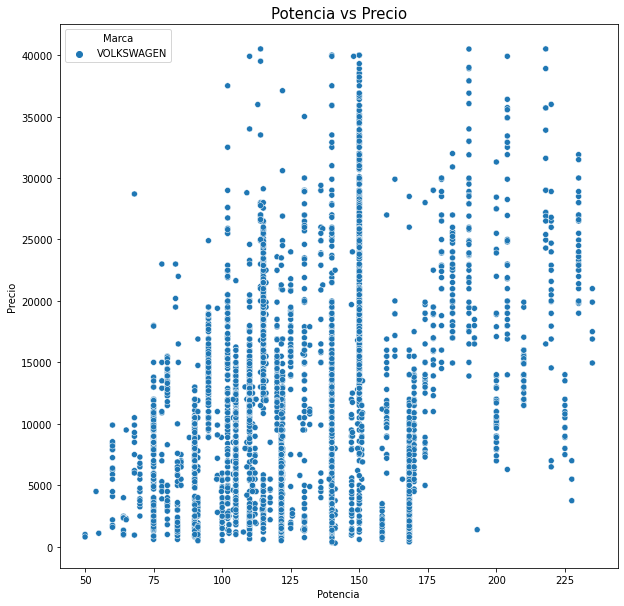

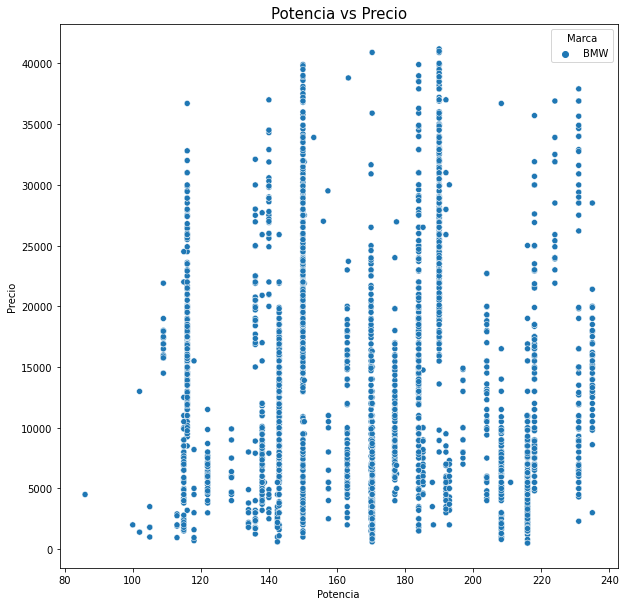

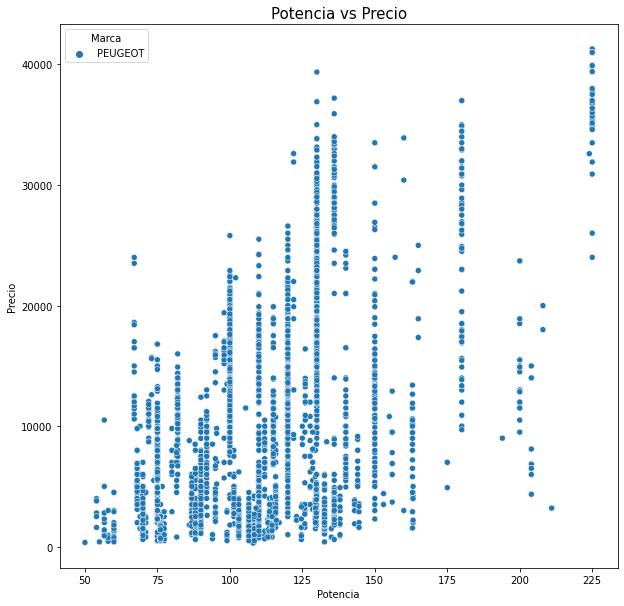

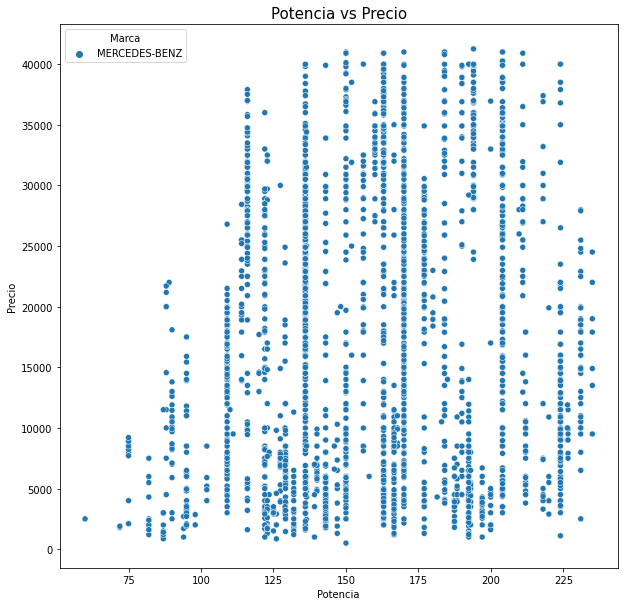

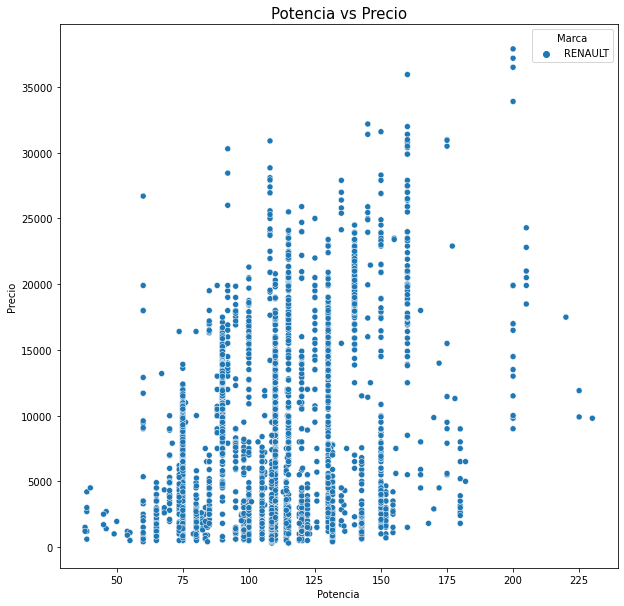

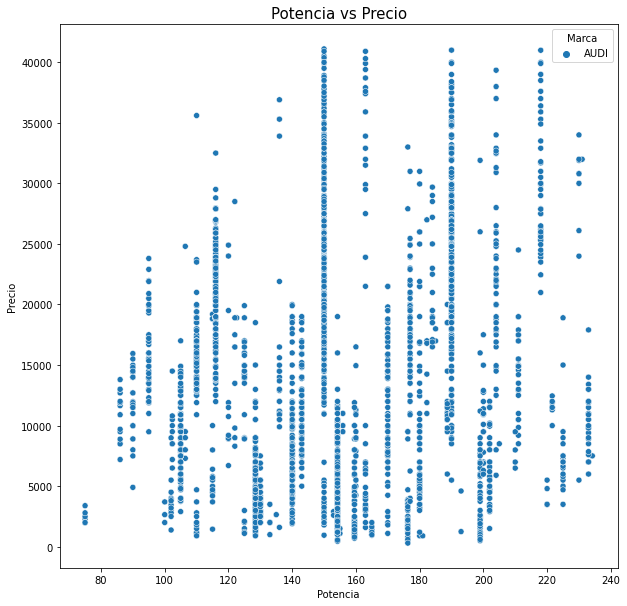

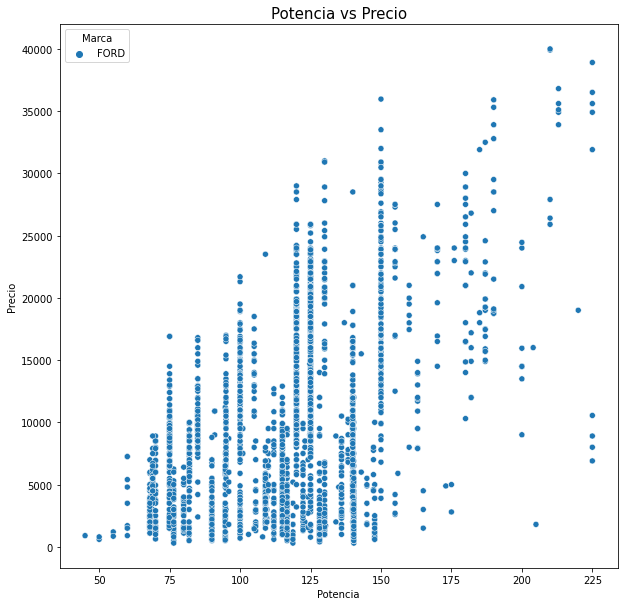

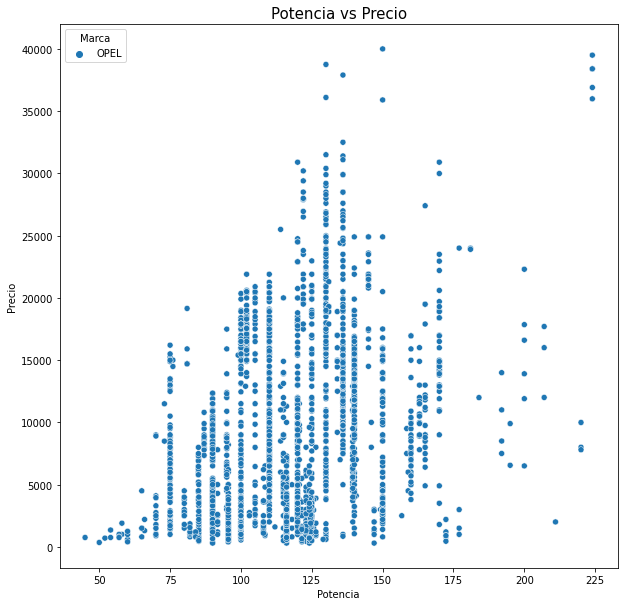

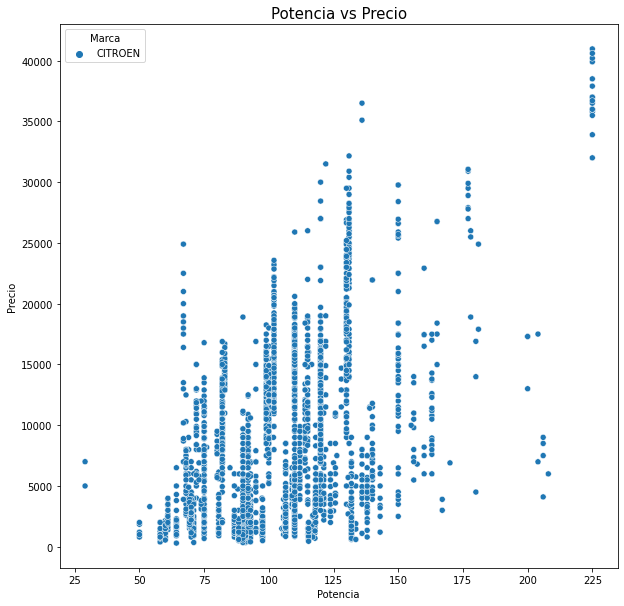

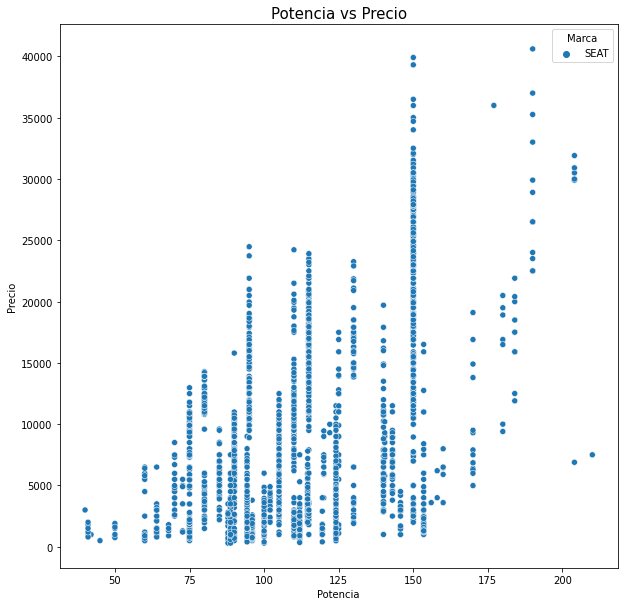

In [ ]:
for i in lista_marcas_top:
    plt.figure(figsize=(10,10),facecolor='w');
    plt.title('Potencia vs Precio', fontsize=15);
    plt.ylabel('Precio')
    plt.xlabel('Potencia')
    sns.scatterplot(x=df_so_fil.Potencia,y=df_so.Precio, hue=df_so_fil.Marca[df_so_fil.Marca == i]);

En este caso las gráficas no son tan claras como en ocasiones anteriores pero se puede ver como la tendencia es aumentar el precio según aumenta la potencia.

# Resumen de las hipótesis

## Hipótesis

- ``Los vehículos con más km son los más baratos`` --> **Confirmada**
- ``La marca de coches más barata es Dacia`` --> **Rechazada**
- ``Los vehículos híbridos son más caros que los Diésel`` --> **Confirmada**
- ``la media de precios es la misma para todas las comunidades autónomas`` --> **Rechazada**
- ``Los vehículos vendidos por profesionales son más caros que los vendidos por particulares`` --> **Confirmada**
- ``Los vehículos mas potentes son los más caros`` --> **Rechazada**